## Index

[Libs](#Libs)

[Carregando o Dataset](#Carregando-o-Dataset)

[Função Metadados](#Função-Metadados)

[Metadados DataFrame](#Metadados-DataFrame)

[Verificação da qualidade dos dados disponibilizados no dataset](#Verificação-da-qualidade-dos-dados-disponibilizados-no-dataset)

[Dividindo o Dataset em treino e teste](#Dividindo-o-Dataset-em-treino-e-teste)

[Benchmark](#Benchmark)

[Modelo com todas as variáveis, sem modificações no dataset](#Modelo-com-todas-as-variáveis,-sem-modificações-no-dataset)

[Sampling Dataset](#Sampling-Dataset)

[Resampling](#Resampling)

[Distribuição das variáveis em relação ao evento](#Distribuição-das-variáveis-em-relação-ao-evento)

[Normalização das Variáveis](#Normalização-das-Variáveis)

[Modelo](#Modelo)

[Modelo com dataset balanceado - df_sampled](#Modelo-com-dataset-balanceado---df_sampled)

[Modelo com dataset balanceado - df_resamp](#Modelo-com-dataset-balanceado---df_resamp)

[Teste de importância das variáveis](#Teste-de-importância-das-variáveis)

[Correlação das variáveis](#Correlação-das-variáveis)

[Função para inclusão das variáveis](#Função-para-inclusão-das-variáveis)

[Visualização do resultado da inclusão das variáveis](#Visualização-do-resultado-da-inclusão-das-variáveis)

[Modelo com o número de variáveis otimizado](#Modelo-com-o-número-de-variáveis-otimizado)

[Otimização dos parâmetros do modelo de reg. logística](#Otimização-dos-parâmetros-do-modelo-de-reg.-logística)

[Resultados do processo de otimização](#Resultados-do-processo-de-otimização)

[XGBoost - Extreme Gradient Boosting](#XGBoost---Extreme-Gradient-Boosting)

[Treinando o modelo com a amostra do dataset normalizada - df_norm](#Treinando-o-modelo-com-a-amostra-do-dataset-normalizada---df_norm)

[Treinando o modelo com dataset balanceado](#Treinando-o-modelo-com-dataset-balanceado)

[Escolha dos melhores parâmetros para o modelo](#Escolha-dos-melhores-parâmetros-para-o-modelo)

[Seleção das variáveis - XGB](#Seleção-das-variáveis---XGB)

[Resultados do processo de otimização - XGB](#Resultados-do-processo-de-otimização---XGB)

[Resultados consolidados](#Resultados-consolidados)

[Métricas Obtidas](#Métricas-Obtidas)

[Considerações Finais](#Considerações-Finais)

# Libs

[Index](#Index)

In [71]:
import numpy as np
import pandas as pd
import os
import time
import math
import warnings

warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Defining work directory

In [2]:
os.chdir('/Users/caio/Documents/projetos_pessoais') 

In [3]:
os.getcwd() # confirmação 

'/Users/caio/Documents/projetos_pessoais'

### Carregando o Dataset

[Índice](#Índice)

In [4]:
df_raw = pd.read_csv('student-mat.csv'
                     ,sep = ';')

print ('Dimensões do Dataset:')
print ()
print (df_raw.shape)

Dimensões do Dataset:

(395, 33)


In [5]:
df_raw.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [6]:
vars_quanti = ['age','absences']

In [7]:
vars_bin = ['schoolsup'
            ,'famsup'
            ,'paid'
            ,'activities'
            ,'nursery'
            ,'higher'
            ,'internet'
            ,'romantic']

In [8]:
vars_quali = ['school'
              , 'address'
              , 'famsize'
              , 'Pstatus'
              , 'Medu'
              , 'Fedu'
              , 'Mjob'
              , 'Fjob'
              , 'reason'
              , 'guardian'
              , 'traveltime'
              , 'studytime'
              , 'failures'
              , 'famrel'
              , 'freetime'
              , 'goout'
              , 'Dalc'
              , 'Walc'
              , 'health']

In [9]:
df_raw.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [11]:
df_raw['target'] = df_raw['G3'].apply(lambda x: 1 if x >= 10 else 0)

## Função Metadados

* Função para obtenção dos Metadados do Dataset

[Índice](#Índice)

[Metadados DataFrame](#Metadados-DataFrame)

In [12]:
def Metadados(dataframe, target_var, id_vars, vars_quanti, vars_quali, vars_bin): 
    '''
    Cria um novo df com pricipais caracteristicas do df inicial,
    como tipo de variaveis, quantidade de valores diferentes, 
    quantidade de missings, etc.
    
    Usa como entrada o df original, a variavel alvo, as vars utilizadas como ID, 
    a lista de variaveis quantitativas, ou continuas e as variaveis qualitativas, 
    binarias ou nao
    '''

    
    '''
    
    Entradas: DF original
              var resposta
              vars ID
              lista de vars quanti
              lista de vars quali
              
    Saida:    DF com proprieades do DF iriginal
    
    '''
    
    train = dataframe

    missing = []
    data = []
    dtype = []
    card = []
    lista_mod = []
    
    for f in train.columns:

        missing=train[f].isnull().sum()
        
        # Definindo o papel das variáveis:
        if f == target_var: #Variável Resposta
            role = 'target'
        elif f in id_vars:
            role = 'id'          
        else:
            role = 'input'

        # Definindo o tipo das variáveis da tabela de entrada
        dtype = train[f].dtype
        
        # Quantidade de domínios distintos para cada variável do tipo ordinal e nominal
        card = train[f].value_counts().shape[0]
        
        # Definindo lista que a var se encaixa('quanti' ou 'quali')
        if f in list(vars_quanti):
            lista_mod = 'quanti'
        elif f in list(vars_quali):
            lista_mod= 'quali'
        elif f in list(vars_bin):
            lista_mod= 'binaria'
        else: 
            lista_mod = 'outra'

        # Criando a lista com todo metadados
        f_dict = {'Variaveis': f
                  ,'Role': role
                  ,'Type': dtype
                  ,'Missing': missing
                  ,'Cardinalidade': card
                  ,'Lista_mod': lista_mod}
        data.append(f_dict)

    meta = pd.DataFrame(data, columns=['Variaveis'
                                       ,'Role'
                                       ,'Type'
                                       ,'Missing'
                                       ,'Cardinalidade'
                                       ,'Lista_mod'])


    return meta 

## Metadados DataFrame

[Índice](#Índice)

[Função Metadados](#Função-Metadados)

In [13]:
id_var = 'address'
Meta_raw = Metadados(df_raw, 'target', id_var, vars_quanti, vars_quali, vars_bin)

In [14]:
Meta_raw

Variaveis    Role    Type  Missing  Cardinalidade Lista_mod
0       school   input  object        0              2     quali
1          sex   input  object        0              2     outra
2          age   input   int64        0              8    quanti
3      address      id  object        0              2     quali
4      famsize   input  object        0              2     quali
5      Pstatus   input  object        0              2     quali
6         Medu   input   int64        0              5     quali
7         Fedu   input   int64        0              5     quali
8         Mjob   input  object        0              5     quali
9         Fjob   input  object        0              5     quali
10      reason   input  object        0              4     quali
11    guardian   input  object        0              3     quali
12  traveltime   input   int64        0              4     quali
13   studytime   input   int64        0              4     quali
14    failures   input   int64        0              4     quali
15   schoolsup   input  object        0              2   binaria
16      famsup   input  object        0              2   binaria
17        paid   input  object        0              2   binaria
18  activities   input  object        0              2   binaria
19     nursery   input  object        0              2   binaria
20      higher   input  object        0              2   binaria
21    internet   input  object        0              2   binaria
22    romantic   input  object        0              2   binaria
23      famrel   input   int64        0              5     quali
24    freetime   input   int64        0              5     quali
25       goout   input   int64        0              5     quali
26        Dalc   input   int64        0              5     quali
27        Walc   input   int64        0              5     quali
28      health   input   int64        0              5     quali
29    absences   input   int64        0             34    quanti
30          G1   input   int64        0             17     outra
31          G2   input   int64        0             17     outra
32          G3   input   int64        0             18     outra
33      target  target   int64        0              2     outra

## Verificação da qualidade dos dados disponibilizados no dataset

[Índice](#Índice)

In [15]:
#Quantidade de 'missings' no Dataset
Meta_raw.Missing.unique()

array([0])

In [16]:
#Quantidade de 'missings' no Dataset
Meta_raw.Type.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [17]:
Meta_raw[Meta_raw.Type == 'int64']

Variaveis    Role   Type  Missing  Cardinalidade Lista_mod
2          age   input  int64        0              8    quanti
6         Medu   input  int64        0              5     quali
7         Fedu   input  int64        0              5     quali
12  traveltime   input  int64        0              4     quali
13   studytime   input  int64        0              4     quali
14    failures   input  int64        0              4     quali
23      famrel   input  int64        0              5     quali
24    freetime   input  int64        0              5     quali
25       goout   input  int64        0              5     quali
26        Dalc   input  int64        0              5     quali
27        Walc   input  int64        0              5     quali
28      health   input  int64        0              5     quali
29    absences   input  int64        0             34    quanti
30          G1   input  int64        0             17     outra
31          G2   input  int64        0             17     outra
32          G3   input  int64        0             18     outra
33      target  target  int64        0              2     outra

In [18]:
Meta_raw[Meta_raw.Lista_mod == 'quanti']

Variaveis   Role   Type  Missing  Cardinalidade Lista_mod
2        age  input  int64        0              8    quanti
29  absences  input  int64        0             34    quanti

## Vars Quanti

In [19]:
vars_quanti

['age', 'absences']

In [20]:
df_bivar = pd.DataFrame()

In [92]:
df_cat_quanti = df_raw[['target']]

for i in vars_quanti:
    
    aux_var = 'cat_' + i
    aux_bivar = pd.DataFrame()
    print (aux_var)
    df_cat_quanti[aux_var] = pd.qcut(df_raw[i], 4,labels=False, duplicates = 'drop')
    df_cat_quanti[i] = df_raw[i]

    aux_bivar['evento'] = df_cat_quanti[[aux_var,'target']][df_cat_quanti.target == 1].groupby([aux_var]).sum().target
    aux_bivar['max'] = df_cat_quanti[[aux_var,i]].groupby([aux_var]).max()[i]
    aux_bivar['min'] = df_cat_quanti[[aux_var,i]].groupby([aux_var]).min()[i]

cat_age
cat_absences


In [97]:
aux_bivar.reset_index(drop = False, inplace = True)
aux_bivar

index  cat_absences  evento  max  min
0      0             0     168    4    0
1      1             1      47    8    5
2      2             2      50   75    9

In [96]:
a = [1,2,3,4,5,6,7,8,9,10]
for i in list(aux_bivar.cat_absences.unique()):
    print(i)
    if df_cat_quanti['absences'] <= aux_bivar['min'][aux_bivar.cat_absences == i]:
        df_cat_quanti['cat_new'] = i
    else: 

0
1
2


cat_age

   cat  evento  pop  taxa_evento   taxa_med  var  var_cat var_tipo
0    0     138  186    74.193548  67.088608  age  cat_age   quanti
1    1      66   98    67.346939  67.088608  age  cat_age   quanti
2    2      48   82    58.536585  67.088608  age  cat_age   quanti
3    3      13   29    44.827586  67.088608  age  cat_age   quanti



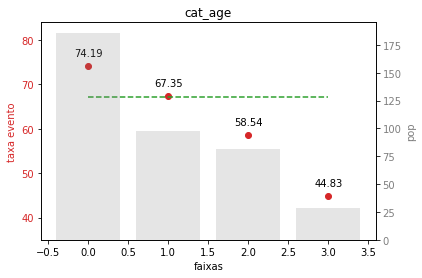

cat_absences

   cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0    0     168  244    68.852459  67.088608  absences  cat_absences   quanti
1    1      47   65    72.307692  67.088608  absences  cat_absences   quanti
2    2      50   86    58.139535  67.088608  absences  cat_absences   quanti



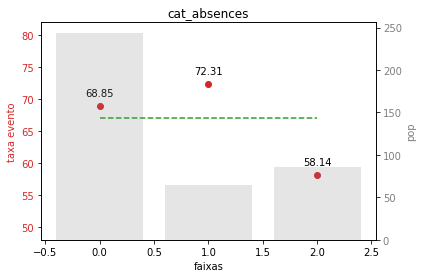

In [21]:
df_cat_quanti = df_raw[['target']]

for i in vars_quanti:
    
    aux_var = 'cat_' + i
    aux_bivar = pd.DataFrame()
    print (aux_var)
    df_cat_quanti[aux_var] = pd.qcut(df_raw[i], 4,labels=False, duplicates = 'drop')

    aux_bivar['evento'] = df_cat_quanti[[aux_var,'target']][df_cat_quanti.target == 1].groupby([aux_var]).sum().target
    aux_bivar['pop'] = df_cat_quanti[[aux_var]].groupby(df_cat_quanti[aux_var]).count()
    aux_bivar.loc[:,'taxa_evento'] = (aux_bivar.loc[:,'evento'] / aux_bivar.loc[:,'pop'])*100
    aux_bivar['taxa_med'] = (aux_bivar.evento.sum()/aux_bivar['pop'].sum())*100
    aux_bivar['var'] = i
    aux_bivar['var_cat']= aux_var
    aux_bivar['var_tipo'] = 'quanti'
    aux_bivar.reset_index(drop = False, inplace = True)
   
    aux_bivar.columns = ['cat'
                        ,'evento'
                        ,'pop'
                        ,'taxa_evento'
                        ,'taxa_med' 
                        ,'var'
                        ,'var_cat'
                        ,'var_tipo']
    
    print()
    print(aux_bivar)
    print()


    df_bivar = pd.concat([df_bivar,aux_bivar], axis = 0)

    
    # Cria a janela
    fig, ax1 = plt.subplots()

    # Taxa de evento por categorias
    color = 'tab:red'
    plt.title(aux_var)
    ax1.set_xlabel('faixas')
    ax1.set_ylabel('taxa evento', color=color)
    ax1.scatter(aux_bivar['cat'], aux_bivar['taxa_evento'], color=color, label = 'taxa evento')
    ax1.tick_params(axis='y', labelcolor=color)
    
    
    
    #ylim
    if aux_bivar['taxa_evento'].min() < 10:
        bottom = 0
    else:
        bottom = round(aux_bivar['taxa_evento'].min() - 10)

    if aux_bivar['taxa_evento'].max() > 90:
        up = 100
    else:
        up = round(aux_bivar['taxa_evento'].max() + 10)
        
    plt.ylim(bottom,up)
        
        
    for x,y in zip(aux_bivar['cat'], aux_bivar['taxa_evento']):

        label = "{:.2f}".format(y)

        # this method is called for each point
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    # Taxa de evento média
    color = 'tab:green'
    ax1.plot(aux_bivar['cat'], aux_bivar['taxa_med'], color=color, linestyle='dashed', label='taxa media de evento')

    # Publico em cada categoria
    ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
    color = 'tab:grey'
    ax2.set_ylabel('pop', color=color)  
    ax2.bar(aux_bivar['cat'], aux_bivar['pop'], color=color, alpha = 0.2, label = 'pulico por categoria')
    ax2.tick_params(axis='y', labelcolor=color)

    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [22]:
df_bivar

cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0    0     138  186    74.193548  67.088608       age       cat_age   quanti
1    1      66   98    67.346939  67.088608       age       cat_age   quanti
2    2      48   82    58.536585  67.088608       age       cat_age   quanti
3    3      13   29    44.827586  67.088608       age       cat_age   quanti
0    0     168  244    68.852459  67.088608  absences  cat_absences   quanti
1    1      47   65    72.307692  67.088608  absences  cat_absences   quanti
2    2      50   86    58.139535  67.088608  absences  cat_absences   quanti

## Vars Quali

In [23]:
vars_quali

['school',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [24]:
#del df_cat_quali


df_cat_quali = df_raw[['target']]

cat_school

  cat  evento  pop  taxa_evento   taxa_med     var     var_cat var_tipo
0  GP     236  349    67.621777  67.088608  school  cat_school    quali
1  MS      29   46    63.043478  67.088608  school  cat_school    quali



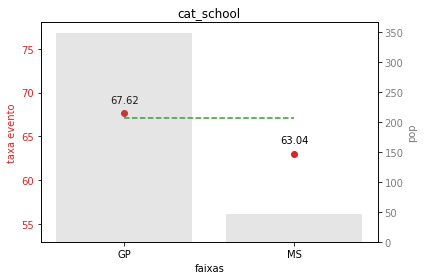

cat_address

  cat  evento  pop  taxa_evento   taxa_med      var      var_cat var_tipo
0   R      55   88    62.500000  67.088608  address  cat_address    quali
1   U     210  307    68.403909  67.088608  address  cat_address    quali



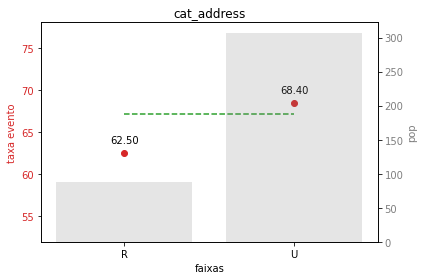

cat_famsize

   cat  evento  pop  taxa_evento   taxa_med      var      var_cat var_tipo
0  GT3     185  281    65.836299  67.088608  famsize  cat_famsize    quali
1  LE3      80  114    70.175439  67.088608  famsize  cat_famsize    quali



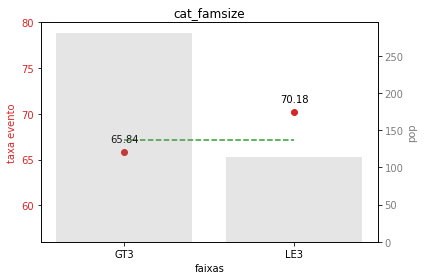

cat_Pstatus

  cat  evento  pop  taxa_evento   taxa_med      var      var_cat var_tipo
0   A      30   41    73.170732  67.088608  Pstatus  cat_Pstatus    quali
1   T     235  354    66.384181  67.088608  Pstatus  cat_Pstatus    quali



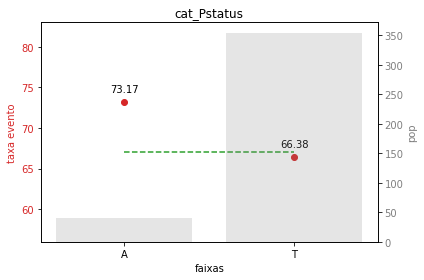

cat_Medu

   cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0    0       2    3    66.666667  67.088608  Medu  cat_Medu    quali
1    1      34   59    57.627119  67.088608  Medu  cat_Medu    quali
2    2      67  103    65.048544  67.088608  Medu  cat_Medu    quali
3    3      64   99    64.646465  67.088608  Medu  cat_Medu    quali
4    4      98  131    74.809160  67.088608  Medu  cat_Medu    quali



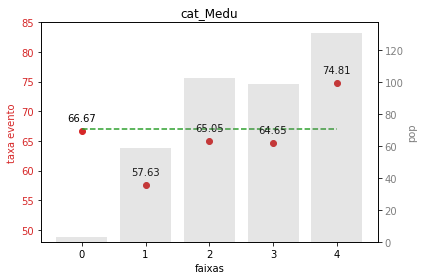

cat_Fedu

   cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0    0       2    2   100.000000  67.088608  Fedu  cat_Fedu    quali
1    1      47   82    57.317073  67.088608  Fedu  cat_Fedu    quali
2    2      77  115    66.956522  67.088608  Fedu  cat_Fedu    quali
3    3      67  100    67.000000  67.088608  Fedu  cat_Fedu    quali
4    4      72   96    75.000000  67.088608  Fedu  cat_Fedu    quali



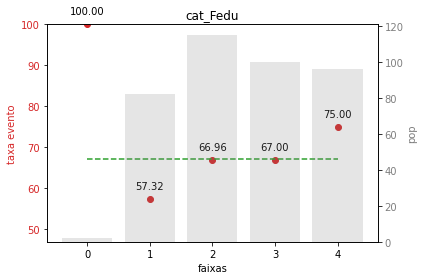

cat_Mjob

        cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0   at_home      37   59    62.711864  67.088608  Mjob  cat_Mjob    quali
1    health      27   34    79.411765  67.088608  Mjob  cat_Mjob    quali
2     other      88  141    62.411348  67.088608  Mjob  cat_Mjob    quali
3  services      74  103    71.844660  67.088608  Mjob  cat_Mjob    quali
4   teacher      39   58    67.241379  67.088608  Mjob  cat_Mjob    quali



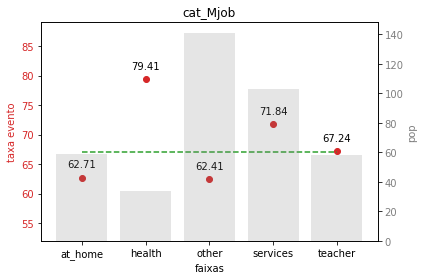

cat_Fjob

        cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0   at_home      12   20    60.000000  67.088608  Fjob  cat_Fjob    quali
1    health      12   18    66.666667  67.088608  Fjob  cat_Fjob    quali
2     other     148  217    68.202765  67.088608  Fjob  cat_Fjob    quali
3  services      71  111    63.963964  67.088608  Fjob  cat_Fjob    quali
4   teacher      22   29    75.862069  67.088608  Fjob  cat_Fjob    quali



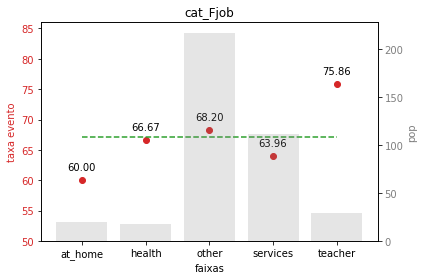

cat_reason

          cat  evento  pop  taxa_evento   taxa_med     var     var_cat  \
0      course      89  145    61.379310  67.088608  reason  cat_reason   
1        home      73  109    66.972477  67.088608  reason  cat_reason   
2       other      27   36    75.000000  67.088608  reason  cat_reason   
3  reputation      76  105    72.380952  67.088608  reason  cat_reason   

  var_tipo  
0    quali  
1    quali  
2    quali  
3    quali  



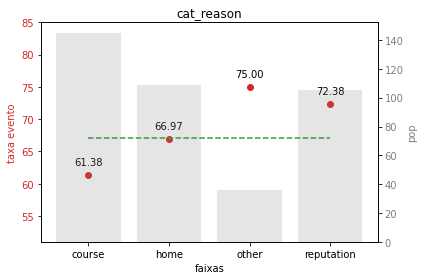

cat_guardian

      cat  evento  pop  taxa_evento   taxa_med       var       var_cat  \
0  father      65   90    72.222222  67.088608  guardian  cat_guardian   
1  mother     184  273    67.399267  67.088608  guardian  cat_guardian   
2   other      16   32    50.000000  67.088608  guardian  cat_guardian   

  var_tipo  
0    quali  
1    quali  
2    quali  



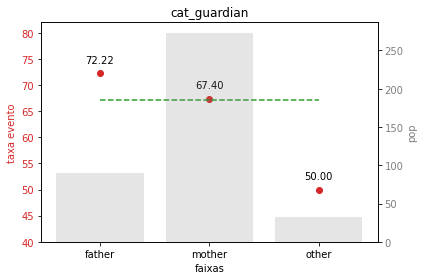

cat_traveltime

   cat  evento  pop  taxa_evento   taxa_med         var         var_cat  \
0    1     177  257    68.871595  67.088608  traveltime  cat_traveltime   
1    2      68  107    63.551402  67.088608  traveltime  cat_traveltime   
2    3      15   23    65.217391  67.088608  traveltime  cat_traveltime   
3    4       5    8    62.500000  67.088608  traveltime  cat_traveltime   

  var_tipo  
0    quali  
1    quali  
2    quali  
3    quali  



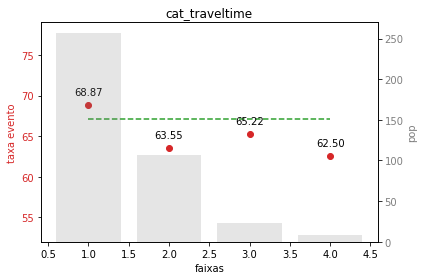

cat_studytime

   cat  evento  pop  taxa_evento   taxa_med        var        var_cat var_tipo
0    1      68  105    64.761905  67.088608  studytime  cat_studytime    quali
1    2     128  198    64.646465  67.088608  studytime  cat_studytime    quali
2    3      49   65    75.384615  67.088608  studytime  cat_studytime    quali
3    4      20   27    74.074074  67.088608  studytime  cat_studytime    quali



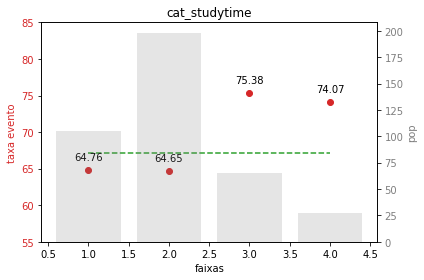

cat_failures

   cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0    0     234  312    75.000000  67.088608  failures  cat_failures    quali
1    1      24   50    48.000000  67.088608  failures  cat_failures    quali
2    2       3   17    17.647059  67.088608  failures  cat_failures    quali
3    3       4   16    25.000000  67.088608  failures  cat_failures    quali



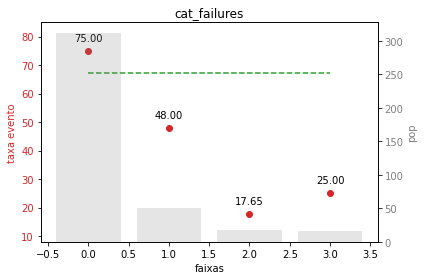

cat_famrel

   cat  evento  pop  taxa_evento   taxa_med     var     var_cat var_tipo
0    1       6    8    75.000000  67.088608  famrel  cat_famrel    quali
1    2      11   18    61.111111  67.088608  famrel  cat_famrel    quali
2    3      42   68    61.764706  67.088608  famrel  cat_famrel    quali
3    4     131  195    67.179487  67.088608  famrel  cat_famrel    quali
4    5      75  106    70.754717  67.088608  famrel  cat_famrel    quali



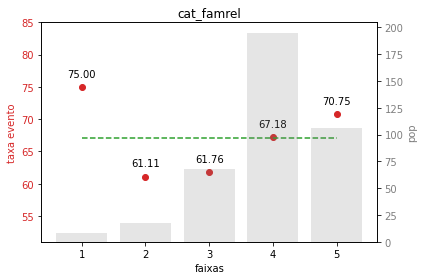

cat_freetime

   cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0    1      12   19    63.157895  67.088608  freetime  cat_freetime    quali
1    2      49   64    76.562500  67.088608  freetime  cat_freetime    quali
2    3     101  157    64.331210  67.088608  freetime  cat_freetime    quali
3    4      74  115    64.347826  67.088608  freetime  cat_freetime    quali
4    5      29   40    72.500000  67.088608  freetime  cat_freetime    quali



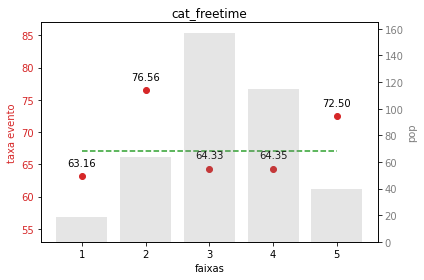

cat_goout

   cat  evento  pop  taxa_evento   taxa_med    var    var_cat var_tipo
0    1      17   23    73.913043  67.088608  goout  cat_goout    quali
1    2      79  103    76.699029  67.088608  goout  cat_goout    quali
2    3      93  130    71.538462  67.088608  goout  cat_goout    quali
3    4      48   86    55.813953  67.088608  goout  cat_goout    quali
4    5      28   53    52.830189  67.088608  goout  cat_goout    quali



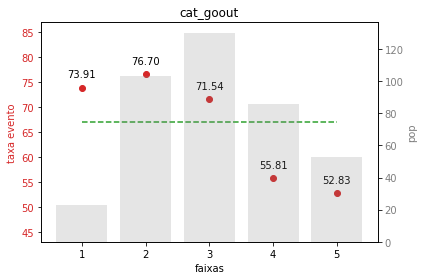

cat_Dalc

   cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0    1     193  276    69.927536  67.088608  Dalc  cat_Dalc    quali
1    2      44   75    58.666667  67.088608  Dalc  cat_Dalc    quali
2    3      17   26    65.384615  67.088608  Dalc  cat_Dalc    quali
3    4       4    9    44.444444  67.088608  Dalc  cat_Dalc    quali
4    5       7    9    77.777778  67.088608  Dalc  cat_Dalc    quali



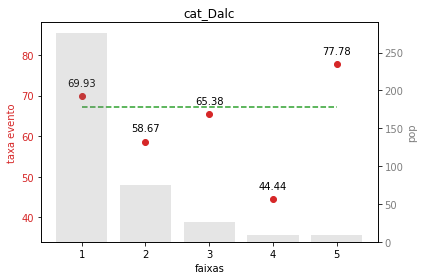

cat_Walc

   cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0    1     101  151    66.887417  67.088608  Walc  cat_Walc    quali
1    2      60   85    70.588235  67.088608  Walc  cat_Walc    quali
2    3      55   80    68.750000  67.088608  Walc  cat_Walc    quali
3    4      31   51    60.784314  67.088608  Walc  cat_Walc    quali
4    5      18   28    64.285714  67.088608  Walc  cat_Walc    quali



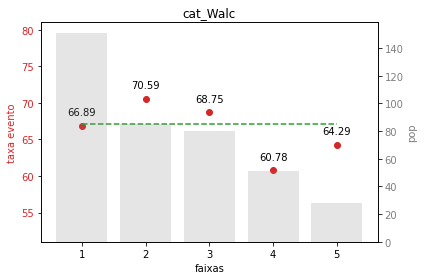

cat_health

   cat  evento  pop  taxa_evento   taxa_med     var     var_cat var_tipo
0    1      37   47    78.723404  67.088608  health  cat_health    quali
1    2      30   45    66.666667  67.088608  health  cat_health    quali
2    3      60   91    65.934066  67.088608  health  cat_health    quali
3    4      42   66    63.636364  67.088608  health  cat_health    quali
4    5      96  146    65.753425  67.088608  health  cat_health    quali



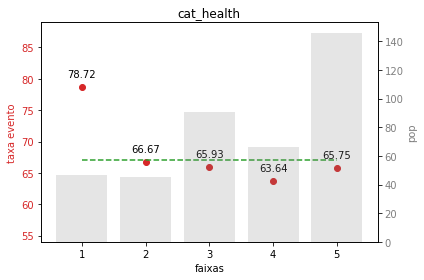

In [25]:
for i in vars_quali:
    
    aux_var = 'cat_' + i
    aux_bivar = pd.DataFrame()
    print (aux_var)
    
    df_cat_quali[aux_var] = df_raw[i]

    aux_bivar['evento'] = df_cat_quali[[aux_var,'target']][df_cat_quali.target == 1].groupby([aux_var]).sum().target
    aux_bivar['pop'] = df_cat_quali[[aux_var]].groupby(df_cat_quali[aux_var]).count()
    aux_bivar.loc[:,'taxa_evento'] = (aux_bivar.loc[:,'evento'] / aux_bivar.loc[:,'pop'])*100
    aux_bivar['taxa_med'] = (aux_bivar.evento.sum()/aux_bivar['pop'].sum())*100
    aux_bivar['var'] = i
    aux_bivar['var_cat']= aux_var
    aux_bivar['var_tipo'] = 'quali'
    aux_bivar.reset_index(drop = False, inplace = True)
   
    aux_bivar.columns = ['cat'
                        ,'evento'
                        ,'pop'
                        ,'taxa_evento'
                        ,'taxa_med' 
                        ,'var'
                        ,'var_cat'
                        ,'var_tipo']
    
    print()
    print(aux_bivar)
    print()


    df_bivar = pd.concat([df_bivar,aux_bivar], axis = 0)

    
    # Cria a janela
    fig, ax1 = plt.subplots()

    # Taxa de evento por categorias
    color = 'tab:red'
    plt.title(aux_var)
    ax1.set_xlabel('faixas')
    ax1.set_ylabel('taxa evento', color=color)
    ax1.scatter(aux_bivar['cat'], aux_bivar['taxa_evento'], color=color, label = 'taxa evento')
    ax1.tick_params(axis='y', labelcolor=color)

    #ylim
    if aux_bivar['taxa_evento'].min() < 10:
        bottom = 0
    else:
        bottom = round(aux_bivar['taxa_evento'].min() - 10)

    if aux_bivar['taxa_evento'].max() > 90:
        up = 100
    else:
        up = round(aux_bivar['taxa_evento'].max() + 10)
        
    plt.ylim(bottom,up)
    
    for x,y in zip(aux_bivar['cat'], aux_bivar['taxa_evento']):

        label = "{:.2f}".format(y)

        # this method is called for each point
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    # Taxa de evento média
    color = 'tab:green'
    ax1.plot(aux_bivar['cat'], aux_bivar['taxa_med'], color=color, linestyle='dashed', label='taxa media de evento')

    # Publico em cada categoria
    ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
    color = 'tab:grey'
    ax2.set_ylabel('pop', color=color)  
    ax2.bar(aux_bivar['cat'], aux_bivar['pop'], color=color, alpha = 0.2, label = 'pulico por categoria')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [26]:
df_bivar

cat  evento  pop  taxa_evento   taxa_med       var       var_cat  \
0          0     138  186    74.193548  67.088608       age       cat_age   
1          1      66   98    67.346939  67.088608       age       cat_age   
2          2      48   82    58.536585  67.088608       age       cat_age   
3          3      13   29    44.827586  67.088608       age       cat_age   
0          0     168  244    68.852459  67.088608  absences  cat_absences   
1          1      47   65    72.307692  67.088608  absences  cat_absences   
2          2      50   86    58.139535  67.088608  absences  cat_absences   
0         GP     236  349    67.621777  67.088608    school    cat_school   
1         MS      29   46    63.043478  67.088608    school    cat_school   
0          R      55   88    62.500000  67.088608   address   cat_address   
1          U     210  307    68.403909  67.088608   address   cat_address   
0        GT3     185  281    65.836299  67.088608   famsize   cat_famsize   
1        LE3      80  114    70.175439  67.088608   famsize   cat_famsize   
0          A      30   41    73.170732  67.088608   Pstatus   cat_Pstatus   
1          T     235  354    66.384181  67.088608   Pstatus   cat_Pstatus   
0          0       2    3    66.666667  67.088608      Medu      cat_Medu   
1          1      34   59    57.627119  67.088608      Medu      cat_Medu   
2          2      67  103    65.048544  67.088608      Medu      cat_Medu   
3          3      64   99    64.646465  67.088608      Medu      cat_Medu   
4          4      98  131    74.809160  67.088608      Medu      cat_Medu   
0          0       2    2   100.000000  67.088608      Fedu      cat_Fedu   
1          1      47   82    57.317073  67.088608      Fedu      cat_Fedu   
2          2      77  115    66.956522  67.088608      Fedu      cat_Fedu   
3          3      67  100    67.000000  67.088608      Fedu      cat_Fedu   
4          4      72   96    75.000000  67.088608      Fedu      cat_Fedu   
0    at_home      37   59    62.711864  67.088608      Mjob      cat_Mjob   
1     health      27   34    79.411765  67.088608      Mjob      cat_Mjob   
2      other      88  141    62.411348  67.088608      Mjob      cat_Mjob   
3   services      74  103    71.844660  67.088608      Mjob      cat_Mjob   
4    teacher      39   58    67.241379  67.088608      Mjob      cat_Mjob   
..       ...     ...  ...          ...        ...       ...           ...   
0          1       6    8    75.000000  67.088608    famrel    cat_famrel   
1          2      11   18    61.111111  67.088608    famrel    cat_famrel   
2          3      42   68    61.764706  67.088608    famrel    cat_famrel   
3          4     131  195    67.179487  67.088608    famrel    cat_famrel   
4          5      75  106    70.754717  67.088608    famrel    cat_famrel   
0          1      12   19    63.157895  67.088608  freetime  cat_freetime   
1          2      49   64    76.562500  67.088608  freetime  cat_freetime   
2          3     101  157    64.331210  67.088608  freetime  cat_freetime   
3          4      74  115    64.347826  67.088608  freetime  cat_freetime   
4          5      29   40    72.500000  67.088608  freetime  cat_freetime   
0          1      17   23    73.913043  67.088608     goout     cat_goout   
1          2      79  103    76.699029  67.088608     goout     cat_goout   
2          3      93  130    71.538462  67.088608     goout     cat_goout   
3          4      48   86    55.813953  67.088608     goout     cat_goout   
4          5      28   53    52.830189  67.088608     goout     cat_goout   
0          1     193  276    69.927536  67.088608      Dalc      cat_Dalc   
1          2      44   75    58.666667  67.088608      Dalc      cat_Dalc   
2          3      17   26    65.384615  67.088608      Dalc      cat_Dalc   
3          4       4    9    44.444444  67.088608      Dalc      cat_Dalc   
4          5       7    9    77.777778  67.088608      Dalc      cat_Dalc   
0    

## Vars Binarias

In [27]:
vars_bin

['schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [28]:
df_cat_bin = df_raw[['target']]

cat_schoolsup

   cat  evento  pop  taxa_evento   taxa_med        var        var_cat var_tipo
0   no     237  344    68.895349  67.088608  schoolsup  cat_schoolsup      bin
1  yes      28   51    54.901961  67.088608  schoolsup  cat_schoolsup      bin



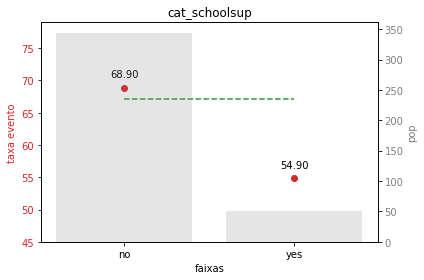

cat_famsup

   cat  evento  pop  taxa_evento   taxa_med     var     var_cat var_tipo
0   no     108  153    70.588235  67.088608  famsup  cat_famsup      bin
1  yes     157  242    64.876033  67.088608  famsup  cat_famsup      bin



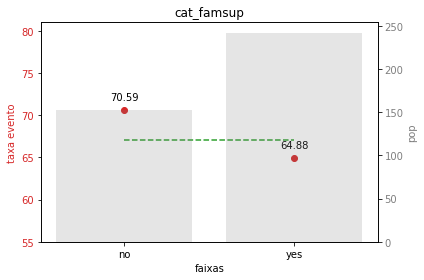

cat_paid

   cat  evento  pop  taxa_evento   taxa_med   var   var_cat var_tipo
0   no     135  214    63.084112  67.088608  paid  cat_paid      bin
1  yes     130  181    71.823204  67.088608  paid  cat_paid      bin



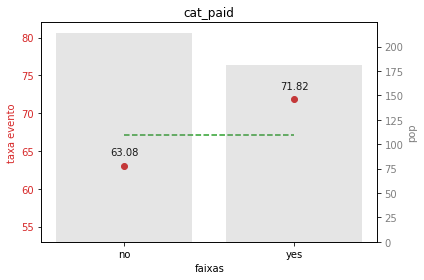

cat_activities

   cat  evento  pop  taxa_evento   taxa_med         var         var_cat  \
0   no     129  194    66.494845  67.088608  activities  cat_activities   
1  yes     136  201    67.661692  67.088608  activities  cat_activities   

  var_tipo  
0      bin  
1      bin  



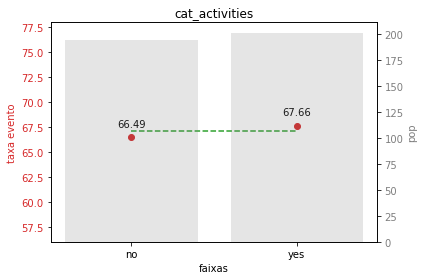

cat_nursery

   cat  evento  pop  taxa_evento   taxa_med      var      var_cat var_tipo
0   no      55   81    67.901235  67.088608  nursery  cat_nursery      bin
1  yes     210  314    66.878981  67.088608  nursery  cat_nursery      bin



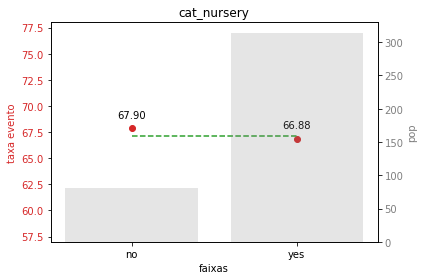

cat_higher

   cat  evento  pop  taxa_evento   taxa_med     var     var_cat var_tipo
0   no       7   20         35.0  67.088608  higher  cat_higher      bin
1  yes     258  375         68.8  67.088608  higher  cat_higher      bin



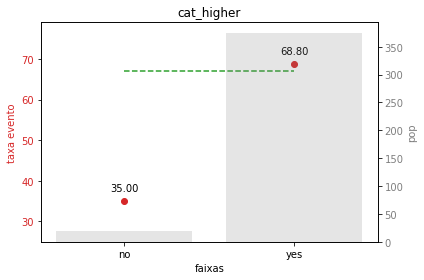

cat_internet

   cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0   no      40   66    60.606061  67.088608  internet  cat_internet      bin
1  yes     225  329    68.389058  67.088608  internet  cat_internet      bin



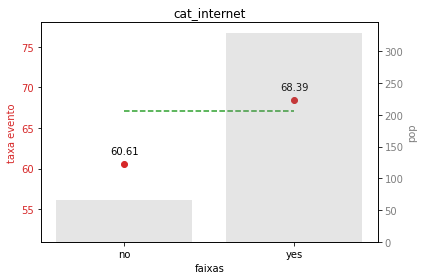

cat_romantic

   cat  evento  pop  taxa_evento   taxa_med       var       var_cat var_tipo
0   no     185  263    70.342205  67.088608  romantic  cat_romantic      bin
1  yes      80  132    60.606061  67.088608  romantic  cat_romantic      bin



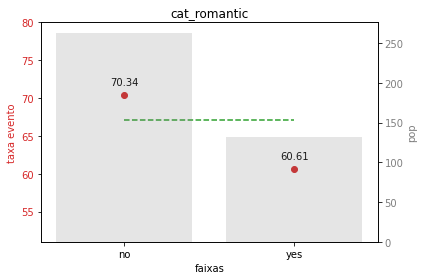

In [29]:
for i in vars_bin:
    
    aux_var = 'cat_' + i
    aux_bivar = pd.DataFrame()
    print (aux_var)
    
    df_cat_bin[aux_var] = df_raw[i]

    aux_bivar['evento'] = df_cat_bin[[aux_var,'target']][df_cat_bin.target == 1].groupby([aux_var]).sum().target
    aux_bivar['pop'] = df_cat_bin[[aux_var]].groupby(df_cat_bin[aux_var]).count()
    aux_bivar.loc[:,'taxa_evento'] = (aux_bivar.loc[:,'evento'] / aux_bivar.loc[:,'pop'])*100
    aux_bivar['taxa_med'] = (aux_bivar.evento.sum()/aux_bivar['pop'].sum())*100
    aux_bivar['var'] = i
    aux_bivar['var_cat']= aux_var
    aux_bivar['var_tipo'] = 'bin'
    aux_bivar.reset_index(drop = False, inplace = True)
   
    aux_bivar.columns = ['cat'
                        ,'evento'
                        ,'pop'
                        ,'taxa_evento'
                        ,'taxa_med' 
                        ,'var'
                        ,'var_cat'
                        ,'var_tipo']
    
    print()
    print(aux_bivar)
    print()


    df_bivar = pd.concat([df_bivar,aux_bivar], axis = 0)

    
    # Cria a janela
    fig, ax1 = plt.subplots()

    # Taxa de evento por categorias
    color = 'tab:red'
    plt.title(aux_var)
    ax1.set_xlabel('faixas')
    ax1.set_ylabel('taxa evento', color=color)
    ax1.scatter(aux_bivar['cat'], aux_bivar['taxa_evento'], color=color, label = 'taxa evento')
    ax1.tick_params(axis='y', labelcolor=color)
    
    #ylim
    if aux_bivar['taxa_evento'].min() < 10:
        bottom = 0
    else:
        bottom = round(aux_bivar['taxa_evento'].min() - 10)

    if aux_bivar['taxa_evento'].max() > 90:
        up = 100
    else:
        up = round(aux_bivar['taxa_evento'].max() + 10)
        
    plt.ylim(bottom,up)
    
    for x,y in zip(aux_bivar['cat'], aux_bivar['taxa_evento']):

        label = "{:.2f}".format(y)

        # this method is called for each point
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    # Taxa de evento média
    color = 'tab:green'
    ax1.plot(aux_bivar['cat'], aux_bivar['taxa_med'], color=color, linestyle='dashed', label='taxa media de evento')

    # Publico em cada categoria
    ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
    color = 'tab:grey'
    ax2.set_ylabel('pop', color=color)  
    ax2.bar(aux_bivar['cat'], aux_bivar['pop'], color=color, alpha = 0.2, label = 'pulico por categoria')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [30]:
df_bivar

cat  evento  pop  taxa_evento   taxa_med         var         var_cat  \
0          0     138  186    74.193548  67.088608         age         cat_age   
1          1      66   98    67.346939  67.088608         age         cat_age   
2          2      48   82    58.536585  67.088608         age         cat_age   
3          3      13   29    44.827586  67.088608         age         cat_age   
0          0     168  244    68.852459  67.088608    absences    cat_absences   
1          1      47   65    72.307692  67.088608    absences    cat_absences   
2          2      50   86    58.139535  67.088608    absences    cat_absences   
0         GP     236  349    67.621777  67.088608      school      cat_school   
1         MS      29   46    63.043478  67.088608      school      cat_school   
0          R      55   88    62.500000  67.088608     address     cat_address   
1          U     210  307    68.403909  67.088608     address     cat_address   
0        GT3     185  281    65.836299  67.088608     famsize     cat_famsize   
1        LE3      80  114    70.175439  67.088608     famsize     cat_famsize   
0          A      30   41    73.170732  67.088608     Pstatus     cat_Pstatus   
1          T     235  354    66.384181  67.088608     Pstatus     cat_Pstatus   
0          0       2    3    66.666667  67.088608        Medu        cat_Medu   
1          1      34   59    57.627119  67.088608        Medu        cat_Medu   
2          2      67  103    65.048544  67.088608        Medu        cat_Medu   
3          3      64   99    64.646465  67.088608        Medu        cat_Medu   
4          4      98  131    74.809160  67.088608        Medu        cat_Medu   
0          0       2    2   100.000000  67.088608        Fedu        cat_Fedu   
1          1      47   82    57.317073  67.088608        Fedu        cat_Fedu   
2          2      77  115    66.956522  67.088608        Fedu        cat_Fedu   
3          3      67  100    67.000000  67.088608        Fedu        cat_Fedu   
4          4      72   96    75.000000  67.088608        Fedu        cat_Fedu   
0    at_home      37   59    62.711864  67.088608        Mjob        cat_Mjob   
1     health      27   34    79.411765  67.088608        Mjob        cat_Mjob   
2      other      88  141    62.411348  67.088608        Mjob        cat_Mjob   
3   services      74  103    71.844660  67.088608        Mjob        cat_Mjob   
4    teacher      39   58    67.241379  67.088608        Mjob        cat_Mjob   
..       ...     ...  ...          ...        ...         ...             ...   
1          2      44   75    58.666667  67.088608        Dalc        cat_Dalc   
2          3      17   26    65.384615  67.088608        Dalc        cat_Dalc   
3          4       4    9    44.444444  67.088608        Dalc        cat_Dalc   
4          5       7    9    77.777778  67.088608        Dalc        cat_Dalc   
0          1     101  151    66.887417  67.088608        Walc        cat_Walc   
1          2      60   85    70.588235  67.088608        Walc        cat_Walc   
2          3      55   80    68.750000  67.088608        Walc        cat_Walc   
3          4      31   51    60.784314  67.088608        Walc        cat_Walc   
4          5      18   28    64.285714  67.088608        Walc        cat_Walc   
0          1      37   47    78.723404  67.088608      health      cat_health   
1          2      30   45    66.666667  67.088608      health      cat_health   
2          3      60   91    65.934066  67.088608      health      cat_health   
3          4      42   66    63.636364  67.088608      health      cat_health   
4          5      96  146    65.753425  67.088608      health      cat_health   
0         no     237  344    68.895349  67.088608   schoolsup   cat_schoolsup   
1        yes      28   51    54.901961  67.088608   schoolsup   cat_schoolsup   
0         no     108  153    70.588235  67.088608      famsup      cat_famsup   
1        yes     157  242    64.876033  

## Information Value - IV

In [31]:
def calc_iv(df, var, target):
    lst = []
    for i in range(df[var].nunique()):
        val = list(df[var].unique())[i]
        lst.append({
            'value': val,
            'all': df[df[var] == val].count()[var],
            'good': df[(df[var] == val) & (df[target] == 0)].count()[var],
            'bad': df[(df[var] == val) & (df[target] == 1)].count()[var]
        })
        
    dset = pd.DataFrame(lst)
    dset['var'] = var
    dset['distr_good'] = dset['good'] / dset['good'].sum()
    dset['distr_bad'] = dset['bad'] / dset['bad'].sum()
    dset['woe'] = np.log(dset['distr_good'] / dset['distr_bad'])
    dset = dset.replace({'woe': {np.inf: 0, -np.inf: 0}})
    dset['iv'] = (dset['distr_good'] - dset['distr_bad']) * dset['woe']
    iv = dset['iv'].sum()
    
    #dset = dset.sort_values(by='WoE')
    
    return dset,iv

### Vars Quanti

In [32]:
iv_quanti = pd.DataFrame()
df_iv_quanti = pd.DataFrame()
for i in vars_quanti:
    aux_var = 'cat_' + i
    aux_iv = calc_iv(df_cat_quanti,aux_var,'target')
    df_iv_quanti = pd.concat([df_iv_quanti,aux_iv[0]],axis = 0)
    
    aux_df_iv = pd.DataFrame({'var':[i]
                              ,'var_cat':[aux_var]
                              ,'IV':aux_iv[1]})
    
    iv_quanti = pd.concat([iv_quanti,aux_df_iv],axis = 0)

In [33]:
iv_quanti

var       var_cat        IV
0       age       cat_age  0.149761
0  absences  cat_absences  0.047487

In [34]:
df_iv_quanti

all  bad  good  value           var  distr_good  distr_bad       woe  \
0   82   48    34      2       cat_age    0.261538   0.181132  0.367355   
1   98   66    32      1       cat_age    0.246154   0.249057 -0.011723   
2  186  138    48      0       cat_age    0.369231   0.520755 -0.343857   
3   29   13    16      3       cat_age    0.123077   0.049057  0.919835   
0   65   47    18      1  cat_absences    0.138462   0.177358 -0.247580   
1  244  168    76      0  cat_absences    0.584615   0.633962 -0.081035   
2   86   50    36      2  cat_absences    0.276923   0.188679  0.383691   

         iv  
0  0.029538  
1  0.000034  
2  0.052103  
3  0.068086  
0  0.009630  
1  0.003999  
2  0.033858

### Vars Quali

In [35]:
vars_quali

['school',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [36]:
iv_quali = pd.DataFrame()
df_iv_quali = pd.DataFrame()
for i in vars_quali:
    aux_var = 'cat_' + i
    aux_iv = calc_iv(df_cat_quali,aux_var,'target')
    df_iv_quali = pd.concat([df_iv_quali,aux_iv[0]],axis = 0)
    
    aux_df_iv = pd.DataFrame({'var':[i]
                              ,'var_cat':[aux_var]
                              ,'IV':aux_iv[1]})
    
    iv_quali = pd.concat([iv_quali,aux_df_iv],axis = 0)

In [37]:
iv_quali

var         var_cat        IV
0      school      cat_school  0.004317
0     address     cat_address  0.012110
0     famsize     cat_famsize  0.008056
0     Pstatus     cat_Pstatus  0.009231
0        Medu        cat_Medu  0.074745
0        Fedu        cat_Fedu  0.072012
0        Mjob        cat_Mjob  0.064465
0        Fjob        cat_Fjob  0.024548
0      reason      cat_reason  0.052261
0    guardian    cat_guardian  0.057681
0  traveltime  cat_traveltime  0.012345
0   studytime   cat_studytime  0.041394
0    failures    cat_failures  0.552970
0      famrel      cat_famrel  0.023312
0    freetime    cat_freetime  0.051126
0       goout       cat_goout  0.179305
0        Dalc        cat_Dalc  0.066251
0        Walc        cat_Walc  0.017981
0      health      cat_health  0.043368

In [38]:
df_iv_quali

all  bad  good     value           var  distr_good  distr_bad       woe  \
0   349  236   113        GP    cat_school    0.869231   0.890566 -0.024249   
1    46   29    17        MS    cat_school    0.130769   0.109434  0.178113   
0   307  210    97         U   cat_address    0.746154   0.792453 -0.060201   
1    88   55    33         R   cat_address    0.253846   0.207547  0.201370   
0   281  185    96       GT3   cat_famsize    0.738462   0.698113  0.056188   
1   114   80    34       LE3   cat_famsize    0.261538   0.301887 -0.143471   
0    41   30    11         A   cat_Pstatus    0.084615   0.113208 -0.291107   
1   354  235   119         T   cat_Pstatus    0.915385   0.886792  0.031733   
0   131   98    33         4      cat_Medu    0.253846   0.369811 -0.376265   
1    59   34    25         1      cat_Medu    0.192308   0.128302  0.404711   
2    99   64    35         3      cat_Medu    0.269231   0.241509  0.108660   
3   103   67    36         2      cat_Medu    0.276923   0.252830  0.091022   
4     3    2     1         0      cat_Medu    0.007692   0.007547  0.019048   
0    96   72    24         4      cat_Fedu    0.184615   0.271698 -0.386417   
1    82   47    35         1      cat_Fedu    0.269231   0.177358  0.417396   
2   115   77    38         2      cat_Fedu    0.292308   0.290566  0.005976   
3   100   67    33         3      cat_Fedu    0.253846   0.252830  0.004010   
4     2    2     0         0      cat_Fedu    0.000000   0.007547  0.000000   
0    59   37    22   at_home      cat_Mjob    0.169231   0.139623  0.192320   
1    34   27     7    health      cat_Mjob    0.053846   0.101887 -0.637731   
2   141   88    53     other      cat_Mjob    0.407692   0.332075  0.205150   
3   103   74    29  services      cat_Mjob    0.223077   0.279245 -0.224574   
4    58   39    19   teacher      cat_Mjob    0.146154   0.147170 -0.006927   
0    29   22     7   teacher      cat_Fjob    0.053846   0.083019 -0.432937   
1   217  148    69     other      cat_Fjob    0.530769   0.558491 -0.050910   
2   111   71    40  services      cat_Fjob    0.307692   0.267925  0.138395   
3    18   12     6    health      cat_Fjob    0.046154   0.045283  0.019048   
4    20   12     8   at_home      cat_Fjob    0.061538   0.045283  0.306730   
0   145   89    56    course    cat_reason    0.430769   0.335849  0.248911   
1    36   27     9     other    cat_reason    0.069231   0.101887 -0.386417   
..  ...  ...   ...       ...           ...         ...        ...       ...   
0   195  131    64         4    cat_famrel    0.492308   0.494340 -0.004119   
1   106   75    31         5    cat_famrel    0.238462   0.283019 -0.171306   
2    68   42    26         3    cat_famrel    0.200000   0.158491  0.232622   
3     8    6     2         1    cat_famrel    0.015385   0.022642 -0.386417   
4    18   11     7         2    cat_famrel    0.053846   0.041509  0.260210   
0   157  101    56         3  cat_freetime    0.430769   0.381132  0.122427   
1    64   49    15         2  cat_freetime    0.115385   0.184906 -0.471575   
2   115   74    41         4  cat_freetime    0.315385   0.279245  0.121702   
3    19   12     7         1  cat_freetime    0.053846   0.045283  0.173199   
4    40   29    11         5  cat_freetime    0.084615   0.109434 -0.257205   
0    86   48    38         4     cat_goout    0.292308   0.181132  0.478581   
1   130   93    37         3     cat_goout    0.284615   0.350943 -0.209486   
2   103   79    24         2     cat_goout    0.184615   0.298113 -0.479199   
3    23   17     6         1     cat_goout    0.046154   0.064151 -0.329258   
4    53   28    25         5     cat_goout    0.192308   0.105660  0.598867   
0   276  193    83         1      cat_Dalc    0.638462   0.728302 -0.131654   
1    75   44    31         2      cat_Dalc    0.238462   0.166038  0.361993   
2     9    7     2         5      cat_Dalc    0.015385   0.026415 -0.540568   
3    26   17     9         3      cat_Dalc    0.069231

### Vars Binarias

In [39]:
iv_bin = pd.DataFrame()
df_iv_bin = pd.DataFrame()
for i in vars_bin:
    aux_var = 'cat_' + i
    aux_iv = calc_iv(df_cat_bin,aux_var,'target')
    df_iv_bin = pd.concat([df_iv_bin,aux_iv[0]],axis = 0)
    
    aux_df_iv = pd.DataFrame({'var':[i]
                              ,'var_cat':[aux_var]
                              ,'IV':aux_iv[1]})
    
    iv_bin = pd.concat([iv_bin,aux_df_iv],axis = 0)

In [40]:
iv_bin

var         var_cat        IV
0   schoolsup   cat_schoolsup  0.042652
0      famsup      cat_famsup  0.016077
0        paid        cat_paid  0.039292
0  activities  cat_activities  0.000698
0     nursery     cat_nursery  0.000351
0      higher      cat_higher  0.103742
0    internet    cat_internet  0.016725
0    romantic    cat_romantic  0.042470

In [41]:
df_iv_bin

all  bad  good value             var  distr_good  distr_bad       woe  \
0   51   28    23   yes   cat_schoolsup    0.176923   0.105660  0.515485   
1  344  237   107    no   cat_schoolsup    0.823077   0.894340 -0.083036   
0  153  108    45    no      cat_famsup    0.346154   0.407547 -0.163273   
1  242  157    85   yes      cat_famsup    0.653846   0.592453  0.098601   
0  214  135    79    no        cat_paid    0.607692   0.509434  0.176368   
1  181  130    51   yes        cat_paid    0.392308   0.490566 -0.223513   
0  194  129    65    no  cat_activities    0.500000   0.486792  0.026770   
1  201  136    65   yes  cat_activities    0.500000   0.513208 -0.026072   
0  314  210   104   yes     cat_nursery    0.800000   0.792453  0.009479   
1   81   55    26    no     cat_nursery    0.200000   0.207547 -0.037041   
0  375  258   117   yes      cat_higher    0.900000   0.973585 -0.078590   
1   20    7    13    no      cat_higher    0.100000   0.026415  1.331235   
0   66   40    26    no    cat_internet    0.200000   0.150943  0.281412   
1  329  225   104   yes    cat_internet    0.800000   0.849057 -0.059514   
0  263  185    78    no    cat_romantic    0.600000   0.698113 -0.151452   
1  132   80    52   yes    cat_romantic    0.400000   0.301887  0.281412   

         iv  
0  0.036735  
1  0.005917  
0  0.010024  
1  0.006053  
0  0.017330  
1  0.021962  
0  0.000354  
1  0.000344  
0  0.000072  
1  0.000280  
0  0.005783  
1  0.097959  
0  0.013805  
1  0.002920  
0  0.014859  
1  0.027610

## Variáveis ordenadas por IV

In [42]:
iv_vars = pd.concat([iv_quanti, iv_quali, iv_bin], axis = 0)

iv_vars.sort_values('IV', ascending = False, inplace = True)

iv_vars.reset_index(drop = True, inplace = True)

iv_vars

var         var_cat        IV
0     failures    cat_failures  0.552970
1        goout       cat_goout  0.179305
2          age         cat_age  0.149761
3       higher      cat_higher  0.103742
4         Medu        cat_Medu  0.074745
5         Fedu        cat_Fedu  0.072012
6         Dalc        cat_Dalc  0.066251
7         Mjob        cat_Mjob  0.064465
8     guardian    cat_guardian  0.057681
9       reason      cat_reason  0.052261
10    freetime    cat_freetime  0.051126
11    absences    cat_absences  0.047487
12      health      cat_health  0.043368
13   schoolsup   cat_schoolsup  0.042652
14    romantic    cat_romantic  0.042470
15   studytime   cat_studytime  0.041394
16        paid        cat_paid  0.039292
17        Fjob        cat_Fjob  0.024548
18      famrel      cat_famrel  0.023312
19        Walc        cat_Walc  0.017981
20    internet    cat_internet  0.016725
21      famsup      cat_famsup  0.016077
22  traveltime  cat_traveltime  0.012345
23     address     cat_address  0.012110
24     Pstatus     cat_Pstatus  0.009231
25     famsize     cat_famsize  0.008056
26      school      cat_school  0.004317
27  activities  cat_activities  0.000698
28     nursery     cat_nursery  0.000351

In [43]:
vars_cat = []
vars_quanti_cat = []
vars_quali_cat = []
vars_bin_cat = []
for var in vars_quanti:
    aux_var = 'cat_' + var
    vars_cat.append(aux_var)
    vars_quanti_cat.append(aux_var)
for var in vars_quali:
    aux_var = 'cat_' + var
    vars_cat.append(aux_var)
    vars_quali_cat.append(aux_var)
for var in vars_bin:
    aux_var = 'cat_' + var
    vars_cat.append(aux_var)  
    vars_bin_cat.append(aux_var)

In [44]:
df_to_corr = pd.concat([df_cat_quanti[vars_quanti_cat],df_cat_quali[vars_quali_cat]], axis = 1)
df_to_corr = pd.concat([df_to_corr,df_cat_bin[vars_bin_cat]], axis = 1)

## Correlação das variáveis

* Esta etapa identifica as variáveis correlacionadas entre si, isto é, que trazem a mesma informação para o modelo
* Aqui as variáveis correlacionadas são removidas do dataset, de acordo com o limiar escolhido, respeitando a ordenação de importância obtida na etapa anterior

[Índice](#Índice)

In [45]:
iv_vars

var         var_cat        IV
0     failures    cat_failures  0.552970
1        goout       cat_goout  0.179305
2          age         cat_age  0.149761
3       higher      cat_higher  0.103742
4         Medu        cat_Medu  0.074745
5         Fedu        cat_Fedu  0.072012
6         Dalc        cat_Dalc  0.066251
7         Mjob        cat_Mjob  0.064465
8     guardian    cat_guardian  0.057681
9       reason      cat_reason  0.052261
10    freetime    cat_freetime  0.051126
11    absences    cat_absences  0.047487
12      health      cat_health  0.043368
13   schoolsup   cat_schoolsup  0.042652
14    romantic    cat_romantic  0.042470
15   studytime   cat_studytime  0.041394
16        paid        cat_paid  0.039292
17        Fjob        cat_Fjob  0.024548
18      famrel      cat_famrel  0.023312
19        Walc        cat_Walc  0.017981
20    internet    cat_internet  0.016725
21      famsup      cat_famsup  0.016077
22  traveltime  cat_traveltime  0.012345
23     address     cat_address  0.012110
24     Pstatus     cat_Pstatus  0.009231
25     famsize     cat_famsize  0.008056
26      school      cat_school  0.004317
27  activities  cat_activities  0.000698
28     nursery     cat_nursery  0.000351

### Correlação Pearson - Variaveis categorizadas

In [46]:
vars_to_test = list(iv_vars['var_cat']) #lista de variáveis, em ordem de importância
df_corr = df_to_corr[vars_to_test].corr().abs() #correlação entre as variâveis explicativas do dataset

# Seleciona o 'triangulo' superior da matriz de correlação, acima da diagonal principal
upper_corr = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))

# Seleciona as variáveis com correlação acima do limiar definido - 0.75 neste caso
to_drop_vars = [column for column in upper_corr.columns if any(upper_corr[column] >= 0.75)]

print(np.shape(to_drop_vars))

print(to_drop_vars)

(0,)
[]


In [47]:
upper_corr

cat_failures  cat_goout   cat_age  cat_Medu  cat_Fedu  \
cat_failures             NaN   0.124561  0.241520  0.236680  0.250408   
cat_goout                NaN        NaN  0.081413  0.064094  0.043105   
cat_age                  NaN        NaN       NaN  0.152610  0.145154   
cat_Medu                 NaN        NaN       NaN       NaN  0.623455   
cat_Fedu                 NaN        NaN       NaN       NaN       NaN   
cat_Dalc                 NaN        NaN       NaN       NaN       NaN   
cat_freetime             NaN        NaN       NaN       NaN       NaN   
cat_absences             NaN        NaN       NaN       NaN       NaN   
cat_health               NaN        NaN       NaN       NaN       NaN   
cat_studytime            NaN        NaN       NaN       NaN       NaN   
cat_famrel               NaN        NaN       NaN       NaN       NaN   
cat_Walc                 NaN        NaN       NaN       NaN       NaN   
cat_traveltime           NaN        NaN       NaN       NaN       NaN   

                cat_Dalc  cat_freetime  cat_absences  cat_health  \
cat_failures    0.136047      0.091987      0.098711    0.065827   
cat_goout       0.266994      0.285019      0.097521    0.009577   
cat_age         0.096286      0.004744      0.159200    0.062377   
cat_Medu        0.019834      0.030891      0.136363    0.046878   
cat_Fedu        0.002386      0.012846      0.020974    0.014742   
cat_Dalc             NaN      0.209001      0.162744    0.077180   
cat_freetime         NaN           NaN      0.028408    0.075733   
cat_absences         NaN           NaN           NaN    0.034164   
cat_health           NaN           NaN           NaN         NaN   
cat_studytime        NaN           NaN           NaN         NaN   
cat_famrel           NaN           NaN           NaN         NaN   
cat_Walc             NaN           NaN           NaN         NaN   
cat_traveltime       NaN           NaN           NaN         NaN   

                cat_studytime  cat_famrel  cat_Walc  cat_traveltime  
cat_failures         0.173563    0.044337  0.141962        0.092239  
cat_goout            0.063904    0.064568  0.420386        0.028540  
cat_age              0.042049    0.059013  0.069138        0.076511  
cat_Medu             0.064944    0.003914  0.047123        0.171639  
cat_Fedu             0.009175    0.001370  0.012631        0.158194  
cat_Dalc             0.196019    0.077594  0.647544        0.138325  
cat_freetime         0.143198    0.150701  0.147822        0.017025  
cat_absences         0.052922    0.085307  0.172429        0.031838  
cat_health           0.075616    0.094056  0.092476        0.007501  
cat_studytime             NaN    0.039731  0.253785        0.100909  
cat_famrel                NaN         NaN  0.113397        0.016808  
cat_Walc                  NaN         NaN       NaN        0.134116  
cat_traveltime            NaN         NaN       NaN             NaN

In [48]:
for i in to_drop_vars:
    vars_to_test.remove(i)
    print (i)

# print(vars_to_test)

# Neste caso, nenhuma variável foi removida do dataset (não existem variáveis altamente correlacionadas no Dataset).

### Correlação Spearman - Variaveis "dummizadas"

In [49]:
vars_to_test = list(iv_vars['var_cat']) #lista de variáveis, em ordem de importância
df_corr = df_to_corr[vars_to_test].corr().abs() #correlação entre as variâveis explicativas do dataset

# Seleciona o 'triangulo' superior da matriz de correlação, acima da diagonal principal
upper_corr = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))

# Seleciona as variáveis com correlação acima do limiar definido - 0.75 neste caso
to_drop_vars = [column for column in upper_corr.columns if any(upper_corr[column] >= 0.75)]

print(np.shape(to_drop_vars))

print(to_drop_vars)

(0,)
[]


In [50]:
upper_corr

cat_failures  cat_goout   cat_age  cat_Medu  cat_Fedu  \
cat_failures             NaN   0.124561  0.241520  0.236680  0.250408   
cat_goout                NaN        NaN  0.081413  0.064094  0.043105   
cat_age                  NaN        NaN       NaN  0.152610  0.145154   
cat_Medu                 NaN        NaN       NaN       NaN  0.623455   
cat_Fedu                 NaN        NaN       NaN       NaN       NaN   
cat_Dalc                 NaN        NaN       NaN       NaN       NaN   
cat_freetime             NaN        NaN       NaN       NaN       NaN   
cat_absences             NaN        NaN       NaN       NaN       NaN   
cat_health               NaN        NaN       NaN       NaN       NaN   
cat_studytime            NaN        NaN       NaN       NaN       NaN   
cat_famrel               NaN        NaN       NaN       NaN       NaN   
cat_Walc                 NaN        NaN       NaN       NaN       NaN   
cat_traveltime           NaN        NaN       NaN       NaN       NaN   

                cat_Dalc  cat_freetime  cat_absences  cat_health  \
cat_failures    0.136047      0.091987      0.098711    0.065827   
cat_goout       0.266994      0.285019      0.097521    0.009577   
cat_age         0.096286      0.004744      0.159200    0.062377   
cat_Medu        0.019834      0.030891      0.136363    0.046878   
cat_Fedu        0.002386      0.012846      0.020974    0.014742   
cat_Dalc             NaN      0.209001      0.162744    0.077180   
cat_freetime         NaN           NaN      0.028408    0.075733   
cat_absences         NaN           NaN           NaN    0.034164   
cat_health           NaN           NaN           NaN         NaN   
cat_studytime        NaN           NaN           NaN         NaN   
cat_famrel           NaN           NaN           NaN         NaN   
cat_Walc             NaN           NaN           NaN         NaN   
cat_traveltime       NaN           NaN           NaN         NaN   

                cat_studytime  cat_famrel  cat_Walc  cat_traveltime  
cat_failures         0.173563    0.044337  0.141962        0.092239  
cat_goout            0.063904    0.064568  0.420386        0.028540  
cat_age              0.042049    0.059013  0.069138        0.076511  
cat_Medu             0.064944    0.003914  0.047123        0.171639  
cat_Fedu             0.009175    0.001370  0.012631        0.158194  
cat_Dalc             0.196019    0.077594  0.647544        0.138325  
cat_freetime         0.143198    0.150701  0.147822        0.017025  
cat_absences         0.052922    0.085307  0.172429        0.031838  
cat_health           0.075616    0.094056  0.092476        0.007501  
cat_studytime             NaN    0.039731  0.253785        0.100909  
cat_famrel                NaN         NaN  0.113397        0.016808  
cat_Walc                  NaN         NaN       NaN        0.134116  
cat_traveltime            NaN         NaN       NaN             NaN

In [51]:
for i in to_drop_vars:
    vars_to_test.remove(i)
    print (i)

# print(vars_to_test)

# Neste caso, nenhuma variável foi removida do dataset (não existem variáveis altamente correlacionadas no Dataset).

## Modelo 1 - Benchmark

In [52]:
df_model_1 = df_raw[['target']]
for var in list(iv_vars['var_cat']):
    print (var)
    var_prefix = var + '_'
    if var in df_cat_quanti.columns:
        print ('quanti')
        aux_df = pd.get_dummies(df_cat_quanti[var], columns = var, prefix = var_prefix)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    elif var in df_cat_quali.columns:
        print ('quali')
        aux_df = pd.get_dummies(df_cat_quali[var], columns = var, prefix = var_prefix)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    else:
        print ('bin')
        aux_df.loc[:,var] = df_cat_bin.loc[:,var].apply(lambda x: 1 if x=='yes' else 0)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    
    

cat_failures
quali
cat_goout
quali
cat_age
quanti
cat_higher
bin
cat_Medu
quali
cat_Fedu
quali
cat_Dalc
quali
cat_Mjob
quali
cat_guardian
quali
cat_reason
quali
cat_freetime
quali
cat_absences
quanti
cat_health
quali
cat_schoolsup
bin
cat_romantic
bin
cat_studytime
quali
cat_paid
bin
cat_Fjob
quali
cat_famrel
quali
cat_Walc
quali
cat_internet
bin
cat_famsup
bin
cat_traveltime
quali
cat_address
quali
cat_Pstatus
quali
cat_famsize
quali
cat_school
quali
cat_activities
bin
cat_nursery
bin


In [98]:
df_model_1.head()

target  cat_failures__0  cat_failures__1  cat_failures__2  cat_failures__3  \
0       0                1                0                0                0   
1       0                1                0                0                0   
2       1                0                0                0                1   
3       1                1                0                0                0   
4       1                1                0                0                0   

   cat_goout__1  cat_goout__2  cat_goout__3  cat_goout__4  cat_goout__5  ...  \
0             0             0             0             1             0  ...   
1             0             0             1             0             0  ...   
2             0             1             0             0             0  ...   
3             0             1             0             0             0  ...   
4             0             1             0             0             0  ...   

   cat_famsize__LE3  cat_school__GP  cat_school__MS  cat_school__GP  \
0                 0               1               0               1   
1                 0               1               0               1   
2                 1               1               0               1   
3                 0               1               0               1   
4                 0               1               0               1   

   cat_school__MS  cat_activities  cat_school__GP  cat_school__MS  \
0               0               0               1               0   
1               0               0               1               0   
2               0               0               1               0   
3               0               1               1               0   
4               0               0               1               0   

   cat_activities  cat_nursery  
0               0            1  
1               0            0  
2               0            1  
3               1            1  
4               0            1  

[5 rows x 128 columns]

## Dividindo o Dataset em treino e teste

[Índice](#Índice)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_model_1.loc[:,df_model_1.columns != 'target'], # Variáveis Explicativas
                                                    df_model_1.target,  # Variável Resposta
                                                    test_size = 0.2, # Proporção entre treino e teste
                                                    random_state = 0, # a 'semente' inicial garante a reprodutibilidade dos resultados
                                                    stratify = df_model_1.target) # Garantia de que a proporção do evento se mantem no treino e no teste


print( '***** Percentual de evento na base de treino *****')
print (y_train.value_counts(normalize = True))
print( '***** Percentual de evento na base de teste  *****')
print (y_test.value_counts(normalize = True))

***** Percentual de evento na base de treino *****
1    0.670886
0    0.329114
Name: target, dtype: float64
***** Percentual de evento na base de teste  *****
1    0.670886
0    0.329114
Name: target, dtype: float64


In [100]:
LR = LogisticRegression(penalty = 'l1',
                             max_iter=100,
                             C=1e9)

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

### Modelo com todas as variáveis, sem modificações no dataset

[Índice](#Índice)

In [101]:
t1 = time.clock()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
t2 = time.clock()

classif_report = metrics.classification_report(y_test,y_pred) 
ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred) 
scores = cross_val_score(LR, X_train,y_train, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test,y_pred)
run_time = t2-t1

In [102]:
df_result_metrics = pd.DataFrame()
df_result_metric_aux = pd.DataFrame({'Model': ['Logistic_Full_all_vars'],
                                     'ROC_AUC_OOS': [ROC_AUC],
                                     'f1-score':[f1score],
                                     'Log_loss': [logloss],
                                     'prec.':[precision],
                                     'recall':[recall],
                                     'ROC_AUC_CV_mean': [scores.mean()],
                                     'ROC_AUC_CV_sd': [scores.std()],
                                     'run time': [run_time]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux)
df_result_metrics[['Model'
                  ,'ROC_AUC_OOS'
                  ,'ROC_AUC_CV_mean']]

Model  ROC_AUC_OOS  ROC_AUC_CV_mean
0  Logistic_Full_all_vars     0.502903         0.628037

In [103]:
df_result_metrics

Model  ROC_AUC_OOS  f1-score   Log_loss     prec.  \
0  Logistic_Full_all_vars     0.502903  0.685185  14.864972  0.672727   

     recall  ROC_AUC_CV_mean  ROC_AUC_CV_sd  run time  
0  0.698113         0.628037       0.060729  0.016552

In [104]:
confusion_matrix(y_test,y_pred)

array([[ 8, 18],
       [16, 37]])

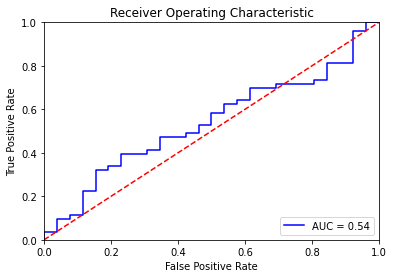

In [105]:
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KS

In [106]:
df_aux = pd.DataFrame({'evento':y_test})
df_aux['score'] = LR.predict_proba(X_test)[:,1]
df_aux['faixa'] = pd.qcut(df_aux['score'], 10, labels=False, duplicates = 'drop')
df_aux_KS = pd.DataFrame()
df_aux_KS['evento'] = df_aux[['faixa','evento']][df_aux.evento == 1].groupby(['faixa']).sum().evento
df_aux_KS['pop'] = df_aux['faixa'].groupby(df_aux['faixa']).count()
df_aux_KS['n_evento'] = df_aux_KS['pop'] - df_aux_KS['evento']
df_aux_KS['pop_acum'] = np.cumsum(df_aux_KS['pop'])
df_aux_KS['tx_evento'] = df_aux_KS[['evento','pop']].apply(lambda x: x[0]/x[1])
df_aux_KS['tx_n_evento'] = df_aux_KS[['n_evento','pop']].apply(lambda x: x[0]/x[1])
df_aux_KS['tx_event_acum'] = np.cumsum(df_aux_KS.tx_evento)
df_aux_KS['tx_n_event_acum'] = np.cumsum(df_aux_KS.tx_n_evento)
df_aux_KS['KS'] = df_aux_KS['tx_event_acum'] - df_aux_KS['tx_n_event_acum']

df_aux_KS.reset_index(drop = False, inplace = True)

df_aux_KS['faixa'] = [1,2,3,4,5,6,7,8,9,10]

In [107]:
def calc_KS(model, X_test, y_test):
    df_aux = pd.DataFrame({'evento':y_test})
    df_aux['score'] = model.predict_proba(X_test)[:,1]
    df_aux['faixa'] = pd.qcut(df_aux['score'], 10, labels=False, duplicates = 'drop')
    df_aux_KS = pd.DataFrame()
    df_aux_KS['evento'] = df_aux[['faixa','evento']][df_aux.evento == 1].groupby(['faixa']).sum().evento
    df_aux_KS['pop'] = df_aux['faixa'].groupby(df_aux['faixa']).count()
    df_aux_KS['tx_evento'] = df_aux_KS['evento']/df_aux_KS['pop'] 
    df_aux_KS['n_evento'] = df_aux_KS['pop'] - df_aux_KS['evento']
    df_aux_KS['evento_acum'] = np.cumsum(df_aux_KS.evento)
    df_aux_KS['n_evento_acum'] = np.cumsum(df_aux_KS.n_evento)
    df_aux_KS['pop_acum'] = np.cumsum(df_aux_KS['pop'])
    df_aux_KS['tx_event_acum'] = df_aux_KS['evento_acum']/df_aux_KS['pop_acum'] 
    df_aux_KS['tx_n_event_acum'] = df_aux_KS['n_evento_acum']/df_aux_KS['pop_acum'] 
    df_aux_KS['KS'] = df_aux_KS['tx_event_acum'] - df_aux_KS['tx_n_event_acum']
    df_aux_KS['percent_total_evento'] = df_aux_KS['evento_acum']/df_aux_KS['evento'].sum()
    df_aux_KS.reset_index(drop = False, inplace = True)

    df_aux_KS['faixa'] = [1,2,3,4,5,6,7,8,9,10]
    return df_aux_KS
    

In [108]:
df_ks = calc_KS(LR,X_test,y_test)

In [109]:
df_ks.KS.max()

0.5

In [110]:
df_ks

faixa  evento  pop  tx_evento  n_evento  evento_acum  n_evento_acum  \
0      1       6    8   0.750000         2            6              2   
1      2       6    8   0.750000         2           12              4   
2      3       4    8   0.500000         4           16              8   
3      4       4    8   0.500000         4           20             12   
4      5       6    8   0.750000         2           26             14   
5      6       4    7   0.571429         3           30             17   
6      7       5    8   0.625000         3           35             20   
7      8       6    8   0.750000         2           41             22   
8      9       6    8   0.750000         2           47             24   
9     10       6    8   0.750000         2           53             26   

   pop_acum  tx_event_acum  tx_n_event_acum        KS  percent_total_evento  
0         8       0.750000         0.250000  0.500000              0.113208  
1        16       0.750000         0.250000  0.500000              0.226415  
2        24       0.666667         0.333333  0.333333              0.301887  
3        32       0.625000         0.375000  0.250000              0.377358  
4        40       0.650000         0.350000  0.300000              0.490566  
5        47       0.638298         0.361702  0.276596              0.566038  
6        55       0.636364         0.363636  0.272727              0.660377  
7        63       0.650794         0.349206  0.301587              0.773585  
8        71       0.661972         0.338028  0.323944              0.886792  
9        79       0.670886         0.329114  0.341772              1.000000

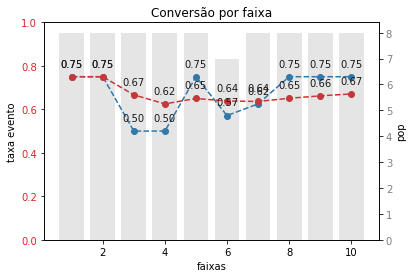

In [111]:
# Cria a janela
fig, ax1 = plt.subplots()

# Taxa de evento por categorias
# color = 'tab:red'
plt.title('Conversão por faixa')
ax1.set_xlabel('faixas')
ax1.set_ylabel('taxa evento')

color = 'tab:blue'
ax1.plot(df_ks['faixa'], df_ks['tx_evento'], color=color, marker = 'o', linestyle='dashed', label='taxa de evento')
ax1.tick_params(axis='y', labelcolor=color)



#ylim
if df_ks['tx_evento'].min() < 0.10:
    bottom = 0
else:
    bottom = round(df_ks['tx_evento'].min() - 0.10)

if df_ks['tx_evento'].max() > 0.90:
    up = 1
else:
    up = round(df_ks['tx_evento'].max() + 0.10)

plt.ylim(bottom,up)


for x,y in zip(df_ks['faixa'], df_ks['tx_evento']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Taxa de evento acumulada
color = 'tab:red'
ax1.plot(df_ks['faixa'], df_ks['tx_event_acum'], color=color, marker = 'o', linestyle='dashed', label='taxa de evento acumulada')
ax1.tick_params(axis='y', labelcolor=color)

for x,y in zip(df_ks['faixa'], df_ks['tx_event_acum']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# Publico em cada categoria
ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
color = 'tab:grey'
ax2.set_ylabel('pop')  
ax2.bar(df_ks['faixa'], df_ks['pop'], color=color, alpha = 0.2, label = 'pulico por faixa')
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

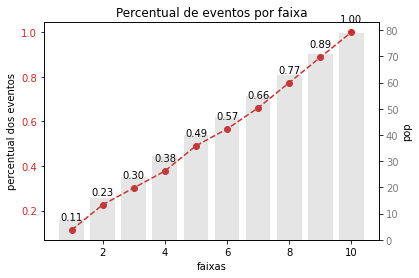

In [112]:
# Cria a janela
fig, ax1 = plt.subplots()

# Taxa de evento por categorias
# color = 'tab:red'
plt.title('Percentual de eventos por faixa')
ax1.set_xlabel('faixas')
ax1.set_ylabel('percentual dos eventos')

color = 'tab:red'
ax1.plot(df_ks['faixa'], df_ks['percent_total_evento'], color=color, marker = 'o', linestyle='dashed', label='percentual dos eventos')
ax1.tick_params(axis='y', labelcolor=color)



#ylim
bottom = round(df_ks['percent_total_evento'].min() - 0.20)
up = round(df_ks['percent_total_evento'].max() + 0.20)




for x,y in zip(df_ks['faixa'], df_ks['percent_total_evento']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# Publico em cada categoria
ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
color = 'tab:grey'
ax2.set_ylabel('pop')  
ax2.bar(df_ks['faixa'], df_ks['pop_acum'], color=color, alpha = 0.2, label = 'pulico por faixa')
ax2.tick_params(axis='y', labelcolor=color)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [113]:
print(__doc__)

Automatically created module for IPython interactive environment


In [114]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [115]:
# gradient boosted trees tend to do well on problems like this
classifier = GradientBoostingClassifier(n_estimators=50, random_state=0)

In [116]:
n_features = X_train.shape[1]

In [117]:
# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]


In [118]:
# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    classifier.set_params(**params)

    return -np.mean(cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="roc_auc"))

In [119]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=-0.7278'

In [120]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=3
- learning_rate=0.000028
- max_features=44
- min_samples_split=4
- min_samples_leaf=15


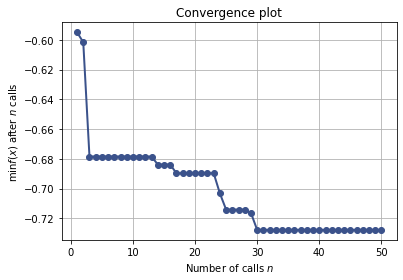

In [121]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)

In [122]:
classifier = GradientBoostingClassifier(n_estimators=50
                                        ,random_state=0
                                        ,max_depth=3
                                        ,learning_rate=0.000028
                                        ,max_features=44
                                        ,min_samples_split=4
                                        ,min_samples_leaf=15)

In [125]:
classifier.fit(X_train,y_train)
pred_xgb = classifier.predict_proba(X_test)

In [126]:
def calc_KS(model, X_test, y_test):
    df_aux = pd.DataFrame({'evento':y_test})
    df_aux['score'] = model.predict_proba(X_test)[:,1]
    df_aux['faixa'] = pd.qcut(df_aux['score'], 10, labels=False, duplicates = 'drop')
    df_aux_KS = pd.DataFrame()
    df_aux_KS['evento'] = df_aux[['faixa','evento']][df_aux.evento == 1].groupby(['faixa']).sum().evento
    df_aux_KS['pop'] = df_aux['faixa'].groupby(df_aux['faixa']).count()
    df_aux_KS['tx_evento'] = df_aux_KS['evento']/df_aux_KS['pop'] 
    df_aux_KS['n_evento'] = df_aux_KS['pop'] - df_aux_KS['evento']
    df_aux_KS['evento_acum'] = np.cumsum(df_aux_KS.evento)
    df_aux_KS['n_evento_acum'] = np.cumsum(df_aux_KS.n_evento)
    df_aux_KS['pop_acum'] = np.cumsum(df_aux_KS['pop'])
    df_aux_KS['tx_event_acum'] = df_aux_KS['evento_acum']/df_aux_KS['pop_acum'] 
    df_aux_KS['tx_n_event_acum'] = df_aux_KS['n_evento_acum']/df_aux_KS['pop_acum'] 
    df_aux_KS['KS'] = df_aux_KS['tx_event_acum'] - df_aux_KS['tx_n_event_acum']
    df_aux_KS['percent_total_evento'] = df_aux_KS['evento_acum']/df_aux_KS['evento'].sum()
    df_aux_KS.reset_index(drop = False, inplace = True)

    df_aux_KS['faixa'] = [1,2,3,4,5,6,7,8,9,10]
    return df_aux_KS
    

In [127]:
df_ks = calc_KS(classifier,X_test,y_test)

In [128]:
df_ks.KS.max()

0.3417721518987342

In [129]:
df_ks

faixa  evento  pop  tx_evento  n_evento  evento_acum  n_evento_acum  \
0      1       3    8   0.375000         5            3              5   
1      2       3    8   0.375000         5            6             10   
2      3       6    8   0.750000         2           12             12   
3      4       7    8   0.875000         1           19             13   
4      5       4    8   0.500000         4           23             17   
5      6       6    7   0.857143         1           29             18   
6      7       7    8   0.875000         1           36             19   
7      8       6    8   0.750000         2           42             21   
8      9       5    8   0.625000         3           47             24   
9     10       6    8   0.750000         2           53             26   

   pop_acum  tx_event_acum  tx_n_event_acum        KS  percent_total_evento  
0         8       0.375000         0.625000 -0.250000              0.056604  
1        16       0.375000         0.625000 -0.250000              0.113208  
2        24       0.500000         0.500000  0.000000              0.226415  
3        32       0.593750         0.406250  0.187500              0.358491  
4        40       0.575000         0.425000  0.150000              0.433962  
5        47       0.617021         0.382979  0.234043              0.547170  
6        55       0.654545         0.345455  0.309091              0.679245  
7        63       0.666667         0.333333  0.333333              0.792453  
8        71       0.661972         0.338028  0.323944              0.886792  
9        79       0.670886         0.329114  0.341772              1.000000

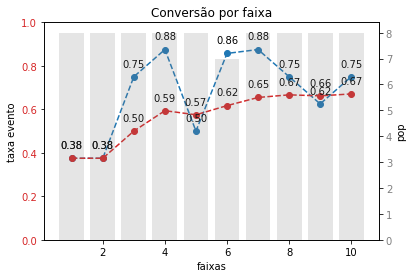

In [130]:
# Cria a janela
fig, ax1 = plt.subplots()

# Taxa de evento por categorias
# color = 'tab:red'
plt.title('Conversão por faixa')
ax1.set_xlabel('faixas')
ax1.set_ylabel('taxa evento')

color = 'tab:blue'
ax1.plot(df_ks['faixa'], df_ks['tx_evento'], color=color, marker = 'o', linestyle='dashed', label='taxa de evento')
ax1.tick_params(axis='y', labelcolor=color)



#ylim
if df_ks['tx_evento'].min() < 0.10:
    bottom = 0
else:
    bottom = round(df_ks['tx_evento'].min() - 0.10)

if df_ks['tx_evento'].max() > 0.90:
    up = 1
else:
    up = round(df_ks['tx_evento'].max() + 0.10)

plt.ylim(bottom,up)


for x,y in zip(df_ks['faixa'], df_ks['tx_evento']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Taxa de evento acumulada
color = 'tab:red'
ax1.plot(df_ks['faixa'], df_ks['tx_event_acum'], color=color, marker = 'o', linestyle='dashed', label='taxa de evento acumulada')
ax1.tick_params(axis='y', labelcolor=color)

for x,y in zip(df_ks['faixa'], df_ks['tx_event_acum']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# Publico em cada categoria
ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
color = 'tab:grey'
ax2.set_ylabel('pop')  
ax2.bar(df_ks['faixa'], df_ks['pop'], color=color, alpha = 0.2, label = 'pulico por faixa')
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

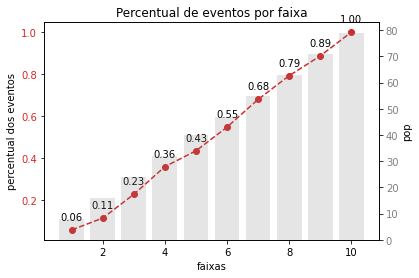

In [131]:
# Cria a janela
fig, ax1 = plt.subplots()

# Taxa de evento por categorias
# color = 'tab:red'
plt.title('Percentual de eventos por faixa')
ax1.set_xlabel('faixas')
ax1.set_ylabel('percentual dos eventos')

color = 'tab:red'
ax1.plot(df_ks['faixa'], df_ks['percent_total_evento'], color=color, marker = 'o', linestyle='dashed', label='percentual dos eventos')
ax1.tick_params(axis='y', labelcolor=color)



#ylim
bottom = round(df_ks['percent_total_evento'].min() - 0.20)
up = round(df_ks['percent_total_evento'].max() + 0.20)




for x,y in zip(df_ks['faixa'], df_ks['percent_total_evento']):

    label = "{:.2f}".format(y)

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# Publico em cada categoria
ax2 = ax1.twinx()  # segundo eixo instanciado, com o primeiro 
color = 'tab:grey'
ax2.set_ylabel('pop')  
ax2.bar(df_ks['faixa'], df_ks['pop_acum'], color=color, alpha = 0.2, label = 'pulico por faixa')
ax2.tick_params(axis='y', labelcolor=color)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Função para inclusão das variáveis

* Esta função inclui variáveis, uma a uma, e re-treina o modelo, armazenando as métricas resultantes em uma dataset para análise posterior.
* Nesta etapa, é possível avaliar a real contribuição da inclusão de cada variável, respeitando a ordem de importância obtida anteriormente.

[Índice](#Índice)

In [134]:
df_model_1 = df_raw[['target']]
for var in list(iv_vars['var_cat']):
    print (var)
    var_prefix = var + '_'
    if var in df_cat_quanti.columns:
        print ('quanti')
        aux_df = pd.get_dummies(df_cat_quanti[var], columns = var, prefix = var_prefix)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    elif var in df_cat_quali.columns:
        print ('quali')
        aux_df = pd.get_dummies(df_cat_quali[var], columns = var, prefix = var_prefix)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    else:
        print ('bin')
        aux_df.loc[:,var] = df_cat_bin.loc[:,var].apply(lambda x: 1 if x=='yes' else 0)
        df_model_1 = pd.concat([df_model_1, aux_df], axis = 1)
    
    classifier.fit(X_train.loc[:,df_model_1.columns != 'target'],y_train)
    

cat_failures
quali


ValueError: max_features must be in (0, n_features]

In [ ]:
def inclui_var(X_train, X_test, y_train, y_test, lista_var):

    X_model_train = X_train[lista_var].reset_index(drop=True)
    X_model_test = X_test[lista_var].reset_index(drop=True)
    df_var_consolid = pd.DataFrame()
    LR = LogisticRegression(penalty = 'l1', # Tipo de regularização
                            max_iter=100,
                            C=1,
                            class_weight = 'balanced')
    for i in range(1,len(lista_var),1):
        
        print('rodando '+ lista_var[i-1])
        df_var = pd.DataFrame()
        
        LR.fit(X_model_train.iloc[:,:i],y_train)
        y_pred = LR.predict(X_model_test.iloc[:,:i])
        
        classif_report = metrics.classification_report(y_test,y_pred) 
        ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
        f1score = metrics.f1_score(y_test,y_pred)   
        logloss = metrics.log_loss(y_test,y_pred)    
        accuracy = metrics.accuracy_score(y_test,y_pred)   
        precision = metrics.precision_score(y_test,y_pred)    
        recall = metrics.recall_score(y_test,y_pred)    

        df_aux = pd.DataFrame({'Variável': lista_var[i-1],
                               'n_variaveis': [i],
                               'ROC_AUC_OOS': ROC_AUC,
                               'f1-score': f1score,
                               'Log_loss': logloss,
                               'precision':precision,
                               'recall': recall})
        
        df_var_consolid = pd.concat([df_var_consolid,df_aux],axis = 0)
        
    return df_var_consolid  

In [ ]:
# DataFrame em branco para armazenar as métricas obtidas pela inclusão de cada variável
df_var_consolid = pd.DataFrame()

df_teste_vars = inclui_var(X_train_norm_resamp, X_test_norm, y_train_resamp, y_test_sampled, vars_to_test)

In [ ]:
df_teste_vars

# Benchmark

### Regressão Logística

[Índice](#Índice)


[Modelos](#Modelos)

In [91]:
SGD = SGDClassifier(loss="perceptron", penalty="l2", max_iter=5)


In [92]:
t1 = time.clock()
SGD.fit(X_train,y_train)
y_pred = SGD.predict(X_test)
t2 = time.clock()

In [93]:
classif_report = metrics.classification_report(y_test,y_pred) 
ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred) 
scores = cross_val_score(SGD, X_train,y_train, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test,y_pred)
run_time = t2-t1

In [94]:
#df_result_metrics = pd.DataFrame()
df_result_metric_aux = pd.DataFrame({'Model': ['SGD_all_vars'],
                                     'ROC_AUC_OOS': [ROC_AUC],
                                     'f1-score':[f1score],
                                     'Log_loss': [logloss],
                                     'prec.':[precision],
                                     'recall':[recall],
                                     'ROC_AUC_CV_mean': [scores.mean()],
                                     'ROC_AUC_CV_sd': [scores.std()],
                                     'run time': [run_time]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux)
df_result_metrics[['Model'
                  ,'ROC_AUC_OOS'
                  ,'ROC_AUC_CV_mean']]

Model  ROC_AUC_OOS  ROC_AUC_CV_mean
0  Logistic_Full_all_vars     0.502903         0.628037
0            SGD_all_vars     0.510522         0.628161

In [95]:
df_result_metrics

Model  ROC_AUC_OOS  f1-score   Log_loss     prec.  \
0  Logistic_Full_all_vars     0.502903  0.685185  14.864972  0.672727   
0            SGD_all_vars     0.510522  0.774194  12.241824  0.676056   

     recall  ROC_AUC_CV_mean  ROC_AUC_CV_sd  run time  
0  0.698113         0.628037       0.060729  0.014102  
0  0.905660         0.628161       0.077504  0.006316

In [96]:
confusion_matrix(y_test,y_pred)

array([[ 3, 23],
       [ 5, 48]])

In [97]:
# calculate the fpr and tpr for all thresholds of the classification
probs = SGD.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AttributeError: probability estimates are not available for loss='perceptron'

In [98]:
t1 = time.clock()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
t2 = time.clock()

classif_report = metrics.classification_report(y_test,y_pred) 
ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred) 
scores = cross_val_score(LR, X_train,y_train, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test,y_pred)
run_time = t2-t1

In [99]:
df_result_metrics = pd.DataFrame()
df_result_metric_aux = pd.DataFrame({'Model': ['Logistic_Full_all_vars'],
                                     'ROC_AUC_OOS': [ROC_AUC],
                                     'f1-score':[f1score],
                                     'Log_loss': [logloss],
                                     'prec.':[precision],
                                     'recall':[recall],
                                     'ROC_AUC_CV_mean': [scores.mean()],
                                     'ROC_AUC_CV_sd': [scores.std()],
                                     'run time': [run_time]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux)
df_result_metrics[['Model'
                  ,'ROC_AUC_OOS'
                  ,'ROC_AUC_CV_mean']]

Model  ROC_AUC_OOS  ROC_AUC_CV_mean
0  Logistic_Full_all_vars     0.502903         0.628037

In [100]:
df_result_metrics

Model  ROC_AUC_OOS  f1-score   Log_loss     prec.  \
0  Logistic_Full_all_vars     0.502903  0.685185  14.864972  0.672727   

     recall  ROC_AUC_CV_mean  ROC_AUC_CV_sd  run time  
0  0.698113         0.628037       0.060729  0.014267

In [101]:
confusion_matrix(y_test,y_pred)

array([[ 8, 18],
       [16, 37]])

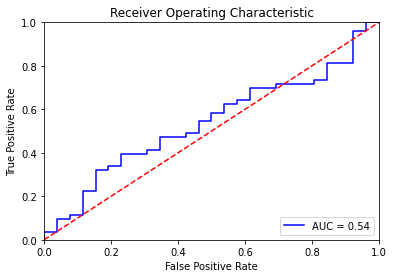

In [59]:
# calculate the fpr and tpr for all thresholds of the classification
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Modelo com todas as variáveis, sem modificações no dataset

[Índice](#Índice)

In [ ]:
t1 = time.clock()
LR_l1.fit(X_train[vars],y_train)
y_pred = LR_l1.predict(X_test[vars])
t2 = time.clock()

classif_report = metrics.classification_report(y_test,y_pred) 
ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)   
logloss = metrics.log_loss(y_test,y_pred)    
accuracy = metrics.accuracy_score(y_test,y_pred)   
precision = metrics.precision_score(y_test,y_pred)    
recall = metrics.recall_score(y_test,y_pred) 
scores = cross_val_score(LR_l1, X_train[vars],y_train, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test,y_pred)
run_time = t2-t1


In [ ]:
df_result_metric_aux = pd.DataFrame({'Model': ['Logistic_Full_all_vars'],
                                     'ROC_AUC_OOS': [ROC_AUC],
                                     'f1-score':[f1score],
                                     'Log_loss': [logloss],
                                     'prec.':[precision],
                                     'recall':[recall],
                                     'ROC_AUC_CV_mean': [scores.mean()],
                                     'ROC_AUC_CV_sd': [scores.std()],
                                     'run time': [run_time]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux)
df_result_metrics['Model'
                  ,'ROC_AUC_OOS'
                  ,'ROC_AUC_CV_mean']

# Organização dos datasets para utilização em todo o notebook


* Seleção de amostra ('sampling') - df_samp
* Balanceamento do evento na base ('Resampling') - df_resamp
* Normalização das variáveis

[Índice](#Índice)


# Sampling Dataset

 * Amostra de 20% do dataset original - df_samp

[Índice](#Índice)

In [ ]:
df_sampled = df_raw.sample(frac = 0.2, # Percentual selecionado aleatoriamente para desenvolvimento dos modelos
                           random_state = 0)

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(df_sampled.loc[:,df_sampled.columns != 'target'], # Variáveis Explicativas
                                                                                    df_sampled.target,  # Variável Resposta
                                                                                    test_size = 0.2, # Proporção entre treino e teste
                                                                                    random_state = 0, # a 'semente' inicial garante a reprodutibilidade dos resultados
                                                                                    stratify = df_sampled.target) # Garantia de que a proporção do evento se mantem no treino e no teste



print('Dimensões das variáveis explicativas na base de treino')
print(X_train_sampled.shape)
print()

print('Percentual de eventos na base de treino') # Garantindo a manutenção da taxa de evento nos datasets
print(y_train_sampled.value_counts(normalize = True))
print()

print('Dimensões das variáveis explicativas na base de teste')
print(X_test_sampled.shape)
print()

print('Percentual de eventos na base de teste') # Garantindo a manutenção da taxa de evento nos datasets
print(y_test_sampled.value_counts(normalize = True))
print()

## Distribuição das variáveis em relação ao evento

[Índice](#Índice)

In [ ]:
for i in vars:
    Var_AUX = i
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot( x=df_sampled['target'], y=df_sampled[i] )
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
    plt.title(Var_AUX)
    plt.ylabel('(u.a.)')

    del Var_AUX

In [ ]:
for i in vars:
    var_AUX = i
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.distplot(df_sampled[var_AUX][df_sampled.target == 0], 
                 hist = False,
                 kde = True, 
                 kde_kws = {'shade':True,
                            'linewidth':3})
    sns.distplot(df_sampled[var_AUX][df_sampled.target == 1], 
             hist = False,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
    plt.title(var_AUX)
#    plt.ylabel('(u.a.)')

    del var_AUX

## Resampling

[Índice](#Índice)

In [ ]:
df_noEvent = df_sampled[df_sampled.target == 0]
df_Event = df_sampled[df_sampled.target == 1]

df_noEvent_resamp = df_noEvent.sample(n = (df_Event.shape[0]), #Seleção de amostra aleatória da população "não evento"
                                      random_state = 0)

df_resamp = pd.concat([df_noEvent_resamp.reset_index(drop=True), df_Event.reset_index(drop=True)],
                       axis = 0) # Combinação das populações "evento" e "não evento"

In [ ]:
print("Dimensões da população 'não-evento'")
print(df_noEvent_resamp.shape)
print()
print("Dimensões da população 'evento'")
print(df_Event.shape)
print()
print('Percentual de eventos no dataset criado: ')
print(df_resamp.target.value_counts(normalize = True))

In [ ]:
X_train_resamp, X_test_resamp, y_train_resamp, y_test_resamp = train_test_split(df_resamp.loc[:,df_resamp.columns != 'target'], # Variáveis Explicativas
                                                                                df_resamp.target,  # Variável Resposta
                                                                                test_size = 0.2, # Proporção entre treino e teste
                                                                                random_state = 0, # a 'semente' inicial garante a reprodutibilidade dos resultados
                                                                                stratify = df_resamp.target) # Garantia de que a proporção do evento se mantem no treino e no teste


### Normalização das Variáveis 

* Realizada com a função 'StandardScaler'

[Índice](#Índice)

In [ ]:
# Normalizando a amostra de treino do Dataset 
scaler = StandardScaler() #Normalização das variáveis levando em conta a distribuição (e não apenas min e max)
X_train_norm = scaler.fit_transform(X_train_sampled[vars])
X_train_norm = pd.DataFrame(data = X_train_norm, columns = vars)
print(X_train_norm.shape)
X_train_norm.head()

In [ ]:
# Normalizando a amostra de teste do Dataset 

X_test_norm = scaler.transform(X_test_sampled[vars])
X_test_norm = pd.DataFrame(data = X_test_norm, columns = vars)
print(X_test_norm.shape)
X_test_norm.head()

In [ ]:
# Normalizando a amostra balanceada de treino do Dataset 

X_train_norm_resamp = scaler.transform(X_train_resamp[vars])
X_train_norm_resamp = pd.DataFrame(data = X_train_norm_resamp, columns = vars)
print(X_train_norm_resamp.shape)
X_train_norm_resamp.head()

In [ ]:
# Normalizando a amostra balanceada de teste do Dataset 

X_test_norm_resamp = scaler.transform(X_test_resamp[vars])
X_test_norm_resamp = pd.DataFrame(data = X_test_norm_resamp, columns = vars)
print(X_test_norm_resamp.shape)
X_test_norm_resamp.head()

# Modelo

[Índice](#Índice)

## Regressão Logística

In [ ]:
# Modelo padrão, sem nenhuma alteração nos parâmetros, a não ser pela "class_weight"
# Este parâmetro leva em conta o desbalanceamento do evento, atribuindo 'cost functions' diferentes e proporcionais.

# Mesmo modelo utilizado na etapa de 'Benchmark'
LR_l1 = LogisticRegression(penalty = 'l1', # Tipo de regularização
                        max_iter=100,
                        C=1,
                        class_weight = 'balanced')

## Modelo com dataset balanceado - df_sampled

### Treinando o mesmo modelo LR_l1 com as mesmas características, mas com uma base menor (df_sampled)

In [ ]:
LR_l1.fit(X_train_norm[vars],y_train_sampled)
y_pred_sampled = LR_l1.predict(X_test_norm[vars])

classif_report = metrics.classification_report(y_test_sampled,y_pred_sampled) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_sampled)
f1score = metrics.f1_score(y_test_sampled,y_pred_sampled)   
logloss = metrics.log_loss(y_test_sampled,y_pred_sampled)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_sampled)   
precision = metrics.precision_score(y_test_sampled,y_pred_sampled)    
recall = metrics.recall_score(y_test_sampled,y_pred_sampled) 
scores = cross_val_score(LR_l1, X_train_norm[vars],y_train_sampled, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test_sampled,y_pred_sampled)

In [ ]:
df_result_metric_aux2 = pd.DataFrame({'Model': ['Logistic_Samp_all_vars'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': [scores.mean()],
                                      'ROC_AUC_CV_sd': [scores.std()]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux2)
df_result_metrics

## Modelo com dataset balanceado - df_resamp

#### Modelo treinado com dataset balanceado e testado na base com as proporções reais

### Teste do modelo no dataset balanceado

In [ ]:
LR_l1.fit(X_train_norm_resamp[vars],y_train_resamp)
y_pred_resamp = LR_l1.predict(X_test_norm_resamp[vars])
classif_report = metrics.classification_report(y_test_resamp,y_pred_resamp) 
ROC_AUC = metrics.roc_auc_score(y_test_resamp,y_pred_resamp)
f1score = metrics.f1_score(y_test_resamp,y_pred_resamp)   
logloss = metrics.log_loss(y_test_resamp,y_pred_resamp)    
accuracy = metrics.accuracy_score(y_test_resamp,y_pred_resamp)   
precision = metrics.precision_score(y_test_resamp,y_pred_resamp)    
recall = metrics.recall_score(y_test_resamp,y_pred_resamp) 
scores = cross_val_score(LR_l1, X_train_norm_resamp[vars],y_train_resamp, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test_resamp,y_pred_resamp)

In [ ]:
df_result_metric_aux3 = pd.DataFrame({'Model': ['Logistic_Resamp_all_vars'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': [scores.mean()],
                                      'ROC_AUC_CV_sd': [scores.std()]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux3)
df_result_metrics

### Teste do modelo no dataset com a proporção original

In [ ]:
LR_l1.fit(X_train_norm_resamp[vars],y_train_resamp)
y_pred_resamp_test = LR_l1.predict(X_test_norm[vars])
classif_report = metrics.classification_report(y_test_sampled,y_pred_resamp_test) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_resamp_test)
f1score = metrics.f1_score(y_test_sampled,y_pred_resamp_test)   
logloss = metrics.log_loss(y_test_sampled,y_pred_resamp_test)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_resamp_test)   
precision = metrics.precision_score(y_test_sampled,y_pred_resamp_test)    
recall = metrics.recall_score(y_test_sampled,y_pred_resamp_test) 
scores = cross_val_score(LR_l1, X_train_norm_resamp[vars],y_train_resamp, cv=5, scoring = 'roc_auc')
confusion_matrix(y_test_sampled,y_pred_resamp_test)

In [ ]:
df_result_metric_aux4 = pd.DataFrame({'Model': ['Logistic_Resamp_all_vars_train_imbal'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': [scores.mean()],
                                      'ROC_AUC_CV_sd': [scores.std()]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux4)
df_result_metrics

## Teste de importância das variáveis

* O objetivo desta etapa é quantificar a contribuição de cada variável do dataset para o modelo gerado.

[Índice](#Índice)

In [ ]:
def teste_variaveis(Var, X_train, y_train, X_test, y_test):

    LR_l1.fit(X_train[[Var]],y_train)
    y_pred = LR_l1.predict(X_test[[Var]])
    classif_report = metrics.classification_report(y_test,y_pred) 
    ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
    f1score = metrics.f1_score(y_test,y_pred)   
    logloss = metrics.log_loss(y_test,y_pred)    
    accuracy = metrics.accuracy_score(y_test,y_pred)   
    precision = metrics.precision_score(y_test,y_pred)    
    recall = metrics.recall_score(y_test,y_pred)    

    df_parametros = pd.DataFrame({'Var': [Var],
                                  'ROC_AUC_OOS': [ROC_AUC],
                                  'f1-score':[f1score],
                                  'Log_loss': [logloss],
                                  'prec.':[precision],
                                  'recall':[recall]})
    return df_parametros

In [ ]:
# Esta etapa treina o modelo de forma independente com cada uma das variáveis e armazena as métricas de interesse
df_var_importancia = pd.DataFrame()
for i in vars:
    df_var_imp_AUX = teste_variaveis(i,X_train_norm_resamp,y_train_resamp,X_test_norm,y_test_sampled)
    df_var_importancia = df_var_importancia.append(df_var_imp_AUX) 

In [ ]:
# Esta etapa ordena as variáveis de acordo com sua contribuição para o modelo gerado (neste caso: 'ROC_AUC')

df_var_importancia.sort_values('ROC_AUC_OOS',ascending = False, inplace = True)
df_var_importancia.loc[:,['Var','ROC_AUC_OOS','Log_loss','f1-score','prec.','recall']]
df_var_importancia.reset_index(drop=True)

## Correlação das variáveis

* Esta etapa identifica as variáveis correlacionadas entre si, isto é, que trazem a mesma informação para o modelo
* Aqui as variáveis correlacionadas são removidas do dataset, de acordo com o limiar escolhido, respeitando a ordenação de importância obtida na etapa anterior

[Índice](#Índice)

In [ ]:
vars_to_test = list(df_var_importancia.Var) #lista de variáveis, em ordem de importância
df_corr = df_sampled[vars_to_test].corr().abs() #correlação entre as variâveis explicativas do dataset

# Seleciona o 'triangulo' superior da matriz de correlação, acima da diagonal principal
upper_corr = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))

# Seleciona as variáveis com correlação acima do limiar definido - 0.75 neste caso
to_drop_vars = [column for column in upper_corr.columns if any(upper_corr[column] >= 0.75)]

print(np.shape(to_drop_vars))

print(to_drop_vars)

In [ ]:
for i in to_drop_vars:
    vars_to_test.remove(i)
    print (i)

# print(vars_to_test)

# Neste caso, nenhuma variável foi removida do dataset (não existem variáveis altamente correlacionadas no Dataset).

# Função para inclusão das variáveis

* Esta função inclui variáveis, uma a uma, e re-treina o modelo, armazenando as métricas resultantes em uma dataset para análise posterior.
* Nesta etapa, é possível avaliar a real contribuição da inclusão de cada variável, respeitando a ordem de importância obtida anteriormente.

[Índice](#Índice)

In [ ]:
def inclui_var(X_train, X_test, y_train, y_test, lista_var):

    X_model_train = X_train[lista_var].reset_index(drop=True)
    X_model_test = X_test[lista_var].reset_index(drop=True)
    df_var_consolid = pd.DataFrame()
    LR = LogisticRegression(penalty = 'l1', # Tipo de regularização
                            max_iter=100,
                            C=1,
                            class_weight = 'balanced')
    for i in range(1,len(lista_var),1):
        
        print('rodando '+ lista_var[i-1])
        df_var = pd.DataFrame()
        
        LR.fit(X_model_train.iloc[:,:i],y_train)
        y_pred = LR.predict(X_model_test.iloc[:,:i])
        
        classif_report = metrics.classification_report(y_test,y_pred) 
        ROC_AUC = metrics.roc_auc_score(y_test,y_pred)
        f1score = metrics.f1_score(y_test,y_pred)   
        logloss = metrics.log_loss(y_test,y_pred)    
        accuracy = metrics.accuracy_score(y_test,y_pred)   
        precision = metrics.precision_score(y_test,y_pred)    
        recall = metrics.recall_score(y_test,y_pred)    

        df_aux = pd.DataFrame({'Variável': lista_var[i-1],
                               'n_variaveis': [i],
                               'ROC_AUC_OOS': ROC_AUC,
                               'f1-score': f1score,
                               'Log_loss': logloss,
                               'precision':precision,
                               'recall': recall})
        
        df_var_consolid = pd.concat([df_var_consolid,df_aux],axis = 0)
        
    return df_var_consolid  

In [ ]:
# DataFrame em branco para armazenar as métricas obtidas pela inclusão de cada variável
df_var_consolid = pd.DataFrame()

df_teste_vars = inclui_var(X_train_norm_resamp, X_test_norm, y_train_resamp, y_test_sampled, vars_to_test)

In [ ]:
df_teste_vars

# Visualização do resultado da inclusão das variáveis

* Visualização da variação das métricas em função da inclusão das variáveis e comparação com a "importância das variáveis" obtidas no modelo treinado com o dataset balanceado (df_resamp) que mostrou melhor performance

[Índice](#Índice)

In [ ]:
# Importância das variáveis obtida no treino do modelo com todas as variáveis

# Rodamos o modelo aqui mais uma vez para garantir os coeficientes de LR_l1
LR_l1.fit(X_train_norm_resamp[vars],y_train_resamp)
y_pred_resamp_test = LR_l1.predict(X_test_norm[vars])

Import_vars = pd.DataFrame({'Var':vars,
                            'Importancia': pd.DataFrame(np.transpose(LR_l1.coef_))[0].abs()})

#Ordenação das variáveis pela importância
Import_vars.sort_values('Importancia',ascending = False, inplace = True)
Import_vars.reset_index(drop=True,inplace = True)

In [ ]:
plt.subplots(2,2,figsize=(14,10))

# ROC_AUC
plt.subplot(2,2,1)
plt.plot(df_teste_vars['n_variaveis'],df_teste_vars['ROC_AUC_OOS'])
#plt.xlabel()
plt.title('ROC_AUC vs N_vars').figsize=(6, 4)
#plt.ylabel()
plt.grid(which='both',axis = 'both')

# f1 Score
plt.subplot(2,2,2)
plt.plot(df_teste_vars['n_variaveis'],df_teste_vars['f1-score'])
#plt.xlabel()
plt.title('f1-score vs N_vars')
#plt.ylabel()
plt.grid(which='both',axis = 'both')

# Log Loss
plt.subplot(2,2,3)
plt.plot(df_teste_vars['n_variaveis'],df_teste_vars['Log_loss'])
plt.xlabel('Num Variáveis')
plt.title('Log_loss vs N_vars')
#plt.ylabel()
plt.grid(which='both',axis = 'both')

# Importância das variáveis
plt.subplot(2,2,4)
plt.plot(Import_vars.index,Import_vars['Importancia'])
plt.xlabel('Num Variáveis')
plt.title('Feature_Importance')
#plt.ylabel()
plt.grid(which='both',axis = 'both')


plt.show()

In [ ]:
df_teste_vars[df_teste_vars.ROC_AUC_OOS == df_teste_vars.ROC_AUC_OOS.max()]

##### Principais resultados desta etapa

* Pelo gráfico da variação da curva ROC_AUC, é possível observar que podemos obter métricas semelhantes, utilizando pouco mais da metade das variáveis do dataset (aprox. 110 variáveis), ou ainda o valor máximo, de 0.78, com 175 variáveis.
* Esta mesma informação não pode ser obtida apensa pela métrica 'feature_importances_', como mostra a figura na parte inferior direita.

[Índice](#Índice)

## Considerando que o obtivo do teste é obter a maior ROC_AUC, escolhemos o ponto de maior valor da métrica (n_vars = 175)

In [ ]:
Optimized_vars = list(df_var_importancia.loc[:155,'Var'])

# Modelo com o número de variáveis otimizado

[Índice](#Índice)

In [ ]:
LR_l1.fit(X_train_norm_resamp[Optimized_vars],y_train_resamp)
y_pred_resamp_test = LR_l1.predict(X_test_norm[Optimized_vars])

classif_report = metrics.classification_report(y_test_sampled,y_pred_resamp_test) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_resamp_test)
f1score = metrics.f1_score(y_test_sampled,y_pred_resamp_test)   
logloss = metrics.log_loss(y_test_sampled,y_pred_resamp_test)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_resamp_test)   
precision = metrics.precision_score(y_test_sampled,y_pred_resamp_test)    
recall = metrics.recall_score(y_test_sampled,y_pred_resamp_test) 
scores = cross_val_score(LR_l1, X_train_resamp[Optimized_vars],y_train_resamp, cv=5, scoring = 'roc_auc')

confusion_matrix(y_test_sampled,y_pred_resamp_test)

In [ ]:
df_result_metric_aux5 = pd.DataFrame({'Model': ['Logistic_Resamp_opt_vars_train_imbal'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': [scores.mean()],
                                      'ROC_AUC_CV_sd': [scores.std()]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux5)
df_result_metrics

# Otimização dos parâmetros do modelo de reg. logística

* Nesta etapa, avaliamos qual a melhor combinação de parâmetros (hiperparâmetros) para este modelo e este problema específico
* Esta etapa é similar à função 'GridSearchCV' do scikit learn. Porém, aqui é possível avaliar a variação de todas as métricas de interesse a cada iteração.

[Índice](#Índice)

In [ ]:
# Loop para avaliação de todas as combinações entre os parâmetros de interesse - Similar ao GridSearchCV

reg = ['l1','l2']
max_iterations = [10,50,100,300]
peso_reg = [1,3,5,7,10]
df_aux_consolid = pd.DataFrame()

for i in reg:
    for j in max_iterations:
        for k in peso_reg:
            LR_test = LogisticRegression(penalty = i,
                                         max_iter = j,
                                         C = k,
                                         class_weight = 'balanced')
            
            LR_test.fit(X_train_norm_resamp[Optimized_vars],y_train_resamp)
            y_pred_test = LR_test.predict(X_test_norm[Optimized_vars])
            
            classif_report = metrics.classification_report(y_test_sampled,y_pred_test) 
            ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_test)
            f1score = metrics.f1_score(y_test_sampled,y_pred_test)   
            logloss = metrics.log_loss(y_test_sampled,y_pred_test)    
            accuracy = metrics.accuracy_score(y_test_sampled,y_pred_test)   
            precision = metrics.precision_score(y_test_sampled,y_pred_test)    
            recall = metrics.recall_score(y_test_sampled,y_pred_test)
            score_test = cross_val_score(LR_test, 
                                         X_train_resamp[Optimized_vars],
                                         y_train_resamp, 
                                         cv=5, 
                                         scoring = 'roc_auc')
            
            df_aux = pd.DataFrame({'Reg': [i],
                                   'Max_Iter': [j],
                                   'Peso_Reg': [k],
                                   'ROC_AUC_OOS': [ROC_AUC],
                                   'f1-score':[f1score],
                                   'Log_loss': [logloss],
                                   'prec.':[precision],
                                   'recall':[recall],
                                   'ROC_AUC_CV_mean': [score_test.mean()],
                                   'ROC_AUC_CV_sd': [score_test.std()]})
            
            df_aux_consolid = pd.concat([df_aux_consolid,df_aux],axis = 0)

In [ ]:
df_aux_consolid.sort_values('ROC_AUC_OOS', ascending = False)

In [ ]:
df_aux_consolid.sort_values('ROC_AUC_CV_mean', ascending = False)

## Resultados do processo de otimização

* Pelos resultados obtidos acima, chegamos na versão otimizada do modelo com a melhor combinação de variáveis e de parâmetros


* Parâmetros:
    - Max_iter = 10
    - penalty = L2
    - C = 1
    
    
* Estes parâmetros retornaram um valor ROC_AUC com validação cruzada(CV) um pouco abaixo (na terceira casa decimal), mas todos os outros parâmetros foram superiores, além de ser um modelo de menor complexidade

* As variáveis finais estão armazenadas em 'Optimized_vars'

[Índice](#Índice)

In [ ]:
LR_final = LogisticRegression(penalty = 'l1',
                              max_iter = 10,
                              C = 1,
                              class_weight = 'balanced')

In [ ]:
LR_final.fit(X_train_resamp[Optimized_vars],y_train_resamp)
y_pred_final = LR_final.predict(X_test_norm[Optimized_vars])

classif_report = metrics.classification_report(y_test_sampled,y_pred_final) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_final)
f1score = metrics.f1_score(y_test_sampled,y_pred_final)   
logloss = metrics.log_loss(y_test_sampled,y_pred_final)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_final)   
precision = metrics.precision_score(y_test_sampled,y_pred_final)    
recall = metrics.recall_score(y_test_sampled,y_pred_final) 
scores = cross_val_score(LR_final, X_train_resamp[Optimized_vars],y_train_resamp, cv=5, scoring = 'roc_auc')

confusion_matrix(y_test_sampled,y_pred_final)

In [ ]:
df_result_metric_aux6 = pd.DataFrame({'Model': ['Logistic_Resamp_opt_final'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': [scores.mean()],
                                      'ROC_AUC_CV_sd': [scores.std()]})

df_result_metrics = df_result_metrics.append(df_result_metric_aux6)
df_result_metrics

# Visualização do Threshold do Evento

[Índice](Índice)

In [ ]:
df_visual = pd.DataFrame({'prob':(LR_final.predict_proba(X_test_sampled[Optimized_vars])[:,1]),
                          'evento':(y_test_sampled)})

In [ ]:
df_visual_no_evento = df_visual[df_visual.evento == 0]
df_visual_evento = df_visual[df_visual.evento == 1]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df_visual_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
sns.distplot(df_visual_no_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
#    plt.title(Var_AUX)
#    plt.ylabel('(u.a.)')


# XGBoost - Extreme Gradient Boosting

* Nesta etapa, utilizamos o mesmo processo realizado para o modelo de Reg. Logística, para avaliar as performance do XGBoost na resolução do problema 

* Aqui, no entanto, partimos do dataset já reduzido por amostragem aleatória

* Relembrando:
    - Dataset com 20% da amostra: X_train_norm, y_train_sampled, X_test_norm e y_test_sampled
    - Neste caso, ao contrário da regressão logística, o XGB não mostrou bons resultados com o balanceamento do dataset

[Índice](#Índice)

In [ ]:
xgbr = XGBClassifier(eta = 0.3,
                     gamma = 0,
                     max_depth = 3,
                     min_child_weight = 1,
                     reg_lambda = 1,
                     reg_alpha = 0,
                     tree_method = 'auto',
                     n_estimators = 100,
                     learn_rate = 0.1,
                     random_state = 0)

## Treinando o modelo com a amostra do dataset normalizada - df_norm

[Índice](#Índice)

In [ ]:
xgbr.fit(X_train_norm[vars],y_train_sampled)
y_pred_sampled = xgbr.predict(X_test_norm[vars])

In [ ]:
classif_report = metrics.classification_report(y_test_sampled,y_pred_sampled) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_sampled)
f1score = metrics.f1_score(y_test_sampled,y_pred_sampled)   
logloss = metrics.log_loss(y_test_sampled,y_pred_sampled)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_sampled)   
precision = metrics.precision_score(y_test_sampled,y_pred_sampled)    
recall = metrics.recall_score(y_test_sampled,y_pred_sampled) 
#scores = cross_val_score(xgbr, X_train_norm[vars],y_train_sampled, cv=4, scoring = 'roc_auc')

confusion_matrix(y_test_sampled,y_pred_sampled)

* O treino com todas as variáveis originais e com os parâmetros 'default'  do algoritmo não chegou a bons resultados, principalmente em relação à sensibilidade na identificação dos eventos (recall)

In [ ]:
df_result_metric_aux7 = pd.DataFrame({'Model': ['XGB_Samp_all_vars'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': ['N/A'],
                                      'ROC_AUC_CV_sd': ['N/A']})

df_result_metrics = df_result_metrics.append(df_result_metric_aux7)
df_result_metrics

## Treinando o modelo com dataset balanceado

* O próximo passo foi treinar o modelo com o dataset balanceado e comparar os resultados

In [ ]:
xgbr.fit(X_train_norm_resamp[vars],y_train_resamp)
y_pred_resamp = xgbr.predict(X_test_sampled[vars])

classif_report = metrics.classification_report(y_test_sampled,y_pred_resamp) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_resamp)
f1score = metrics.f1_score(y_test_sampled,y_pred_resamp)   
logloss = metrics.log_loss(y_test_sampled,y_pred_resamp)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_resamp)   
precision = metrics.precision_score(y_test_sampled,y_pred_resamp)    
recall = metrics.recall_score(y_test_sampled,y_pred_resamp) 
#scores = cross_val_score(xgbr, X_train_norm_resamp[vars],y_train_resamp, cv=4, scoring = 'roc_auc')

confusion_matrix(y_test_sampled,y_pred_resamp)

* A alteração na proporção dos eventos fez com que o algoritmo classificasse todos as observações como evento (target = 1)

In [ ]:
df_result_metric_aux8 = pd.DataFrame({'Model': ['XGB_Resamp_all_vars'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': ['N/A'],
                                      'ROC_AUC_CV_sd': ['N/A']})

df_result_metrics = df_result_metrics.append(df_result_metric_aux8)
df_result_metrics

### Alteração na estratégia de resolução do problema

* Neste caso, como o modelo não mostrou bons resultados pelo mesmo princípio, podemos inverter as etapas e trabalhar primeiro na otimização dos parâmetros do modelo

# Escolha dos melhores parâmetros para o modelo

[Índice](#Índice)

In [ ]:
# Loop para avaliação de todas as combinações entre os parâmetros de interesse - Similar ao GridSearchCV
df_aux_consolid = pd.DataFrame()

Gamma = [0,1,2]
Prof_Max = [3,4,5]
Reg_Lambda = [1,2]
Reg_Alpha = [0,1]
Estimadores = [1000]
Learning_Rate = [0.01,0.03,0.05,0.1]

for a in Gamma:
    for b in Prof_Max:
        for c in Reg_Lambda:
            for d in Reg_Alpha:
                for e in Estimadores:
                    for f in Learning_Rate:
                                                                
                        xgbr_test = XGBClassifier(eta = 0.3,
                                             gamma = a,
                                             max_depth = b,
                                             min_child_weight = 1,
                                             reg_lambda = c,
                                             reg_alpha = d,
                                             tree_method = 'auto',
                                             n_estimators = e,
                                             learn_rate = f,
                                             random_state = 0)

                        xgbr_test.fit(X_train_norm[vars],y_train_sampled)
                        y_pred_test = xgbr_test.predict(X_test_norm[vars])

                        classif_report = metrics.classification_report(y_test_sampled,y_pred_test) 
                        ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_test)
                        f1score = metrics.f1_score(y_test_sampled,y_pred_test)   
                        logloss = metrics.log_loss(y_test_sampled,y_pred_test)    
                        accuracy = metrics.accuracy_score(y_test_sampled,y_pred_test)   
                        precision = metrics.precision_score(y_test_sampled,y_pred_test)    
                        recall = metrics.recall_score(y_test_sampled,y_pred_test)
                        

                        df_aux = pd.DataFrame({'Gamma': [a],
                                               'Max_Depth': [b],
                                               'Lambda': [c],
                                               'Alpha': [d],
                                               'Estimators': [e],
                                               'Learn_Rate': [f],
                                               'ROC_AUC': [ROC_AUC],
                                               'f1-score':[f1score],
                                               'Log_loss': [logloss],
                                               'prec.':[precision],
                                               'recall':[recall]})

                        print(df_aux)

                        df_aux_consolid = pd.concat([df_aux_consolid,df_aux],axis = 0)

In [ ]:
df_aux_consolid

* Nesta etapa, podemos utilizar os melhores parâmetros, obtidos acima, e trabalhar na seleção das variáveis posteriormente.
* Como já sabemos do início que as variáveis não são correlacionadas entre si, como visto na etapa de [Correlação das Variáveis](#Correlação-das-variáveis), podemos ordenar as variáveis pelo parâmetro 'feature_importances_' do algoritmo e verificar como a inclusão das variáveis, nesta ordem, influencia na performance do modelo.

In [ ]:
df_aux_consolid.sort_values('ROC_AUC',ascending = False, inplace = True)
df_aux_consolid.reset_index(drop = True, inplace = True)
df_aux_consolid

In [ ]:
# Modelo com os parâmetros otimizados na etapa anterior
xgbr_final = XGBClassifier(gamma = 0,
                           max_depth = 3,
                           reg_lambda = 2,
                           reg_alpha = 2,
                           n_estimators = 1000,
                           learn_rate = 0.01,
                           random_state = 0)

xgbr_final.fit(X_train_norm[vars],y_train_sampled)
y_pred_test = xgbr_final.predict(X_test_norm[vars])

## Importância das variáveis - XGB

* Como o processo de inclusão das variáveis, realizado na etapa anterior é muito custoso para o XGB nesta janela temporal, aqui podemos selecionar as variáveis de acordo com sua importância na construção do modelo, indicada pelo parâmetro 'feature_importances_'

[Índice](#Índice)

In [ ]:
Import_vars_xgb = pd.DataFrame({'Var':vars,
                                'Importancia': xgbr_final.feature_importances_})

#Ordenação das variáveis pela importância
Import_vars_xgb.sort_values('Importancia',ascending = False, inplace = True)
Import_vars_xgb.reset_index(drop=True,inplace = True)

In [ ]:
Import_vars_xgb

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (15,40))

# Example data
var = Import_vars_xgb['Var']
y_pos = np.arange(len(var))
importance = Import_vars_xgb['Importancia']

ax.barh(y_pos, importance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(var)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('importance')
ax.set_ylabel('variaveis')
ax.set_title('var -- importance >> xg')

plt.show()

##### Principais resultados desta etapa

* Pelo gráfico da variação da curva ROC_AUC, é possível observar que podemos obter métricas semelhantes, utilizando pouco mais da metade das variáveis do dataset (aprox. 110 variáveis), ou ainda o valor máximo, de 0.78, com 175 variáveis.
* Esta mesma informação não pode ser obtida apensa pela métrica 'feature importances_', como mostra a figura na parte inferior direita.

[Índice](#Índice)

## Seleção das variáveis - XGB

* Aqui, selecionamso as variáveis definindo a inclusão das variáveis com coeficiente maior que 0.005
* Esta limiarização diminui o número de variáveis utilizadas no modelo que, em teoria, trazem pouca informação ao estudo, como podemos observar na manutenção da performance do modelo

[Índice](#Índice)

In [ ]:
Optimized_vars_xgbb = list(Import_vars_xgb['Var'][Import_vars_xgb.Importancia > 0.005])

In [ ]:
np.shape(Optimized_vars_xgbb)

## Resultados do processo de otimização - XGB

* Pelos resultados obtidos acima, chegamos na versão otimizada do modelo com a melhor combinação de variáveis e de parâmetros


* Parâmetros:
    - gamma: 0
    - max_depth: 3
    - reg_lambda: 2
    - reg_alpha: 2
    - n_estimators: 1000 
    - learn_rate: 0.01
    
    
* Nesta etapa, não foi feita a validação cruzada pela limitação de tempo

* As variáveis finais estão armazenadas em 'Optimized_vars'

[Índice](#Índice)

In [ ]:
xgbr_final.fit(X_train_norm[Optimized_vars_xgbb],y_train_sampled)
y_pred_final = xgbr_final.predict(X_test_norm[Optimized_vars_xgbb])

classif_report = metrics.classification_report(y_test_sampled,y_pred_final) 
ROC_AUC = metrics.roc_auc_score(y_test_sampled,y_pred_final)
f1score = metrics.f1_score(y_test_sampled,y_pred_final)   
logloss = metrics.log_loss(y_test_sampled,y_pred_final)    
accuracy = metrics.accuracy_score(y_test_sampled,y_pred_final)   
precision = metrics.precision_score(y_test_sampled,y_pred_final)    
recall = metrics.recall_score(y_test_sampled,y_pred_final) 
# scores = cross_val_score(LR_final, X_train_resamp[Optimized_vars],y_train_resamp, cv=5, scoring = 'roc_auc')

confusion_matrix(y_test_sampled,y_pred_final)

# Visualização do Threshold do Evento

[Índice](Índice)

In [ ]:
df_visual_xgb = pd.DataFrame({'prob':(xgbr_final.predict_proba(X_test_norm[Optimized_vars_xgbb])[:,1]),
                              'evento':(y_test_sampled)})
df_visual_xgb.prob.min()

In [ ]:
df_visual_xgb.prob.max()

In [ ]:
df_visual_xgb_no_evento = df_visual_xgb[df_visual_xgb.evento == 0]
df_visual_xgb_evento = df_visual_xgb[df_visual_xgb.evento == 1]

In [ ]:
df_visual_xgb_evento[df_visual_xgb_evento.prob > 0.5].count()

In [ ]:
df_visual_xgb_evento[df_visual_xgb_evento.prob <= 0.5].count()

In [ ]:
df_visual_xgb_evento[df_visual_xgb_evento.prob > 0.1].count()

In [ ]:
df_visual_xgb_evento[df_visual_xgb_evento.prob <= 0.1].count()

In [ ]:
df_visual_xgb_no_evento[df_visual_xgb_no_evento.prob > 0.5].count()

In [ ]:
df_visual_xgb_no_evento[df_visual_xgb_no_evento.prob <= 0.5].count()

In [ ]:
df_visual_xgb_no_evento[df_visual_xgb_no_evento.prob > 0.1].count()

In [ ]:
df_visual_xgb_no_evento[df_visual_xgb_no_evento.prob <= 0.1].count()

In [ ]:
recall_teste_01 = 571/(571+232)
print(recall_teste_01)
recall_teste_05 = 199/(199+604)
print(recall_teste_05)
precision_01 = 571/(571+1274)
print(precision_01)
precision_05 = 199/(199+97)
print(precision_05)
f1_01 = 2*recall_teste_01*precision_01/(recall_teste_01+precision_01)
print(f1_01)
f1_05 = 2*recall_teste_05*precision_05/(recall_teste_05+precision_05)
print(f1_05)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df_visual_xgb_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
sns.distplot(df_visual_xgb_no_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
#    plt.title(Var_AUX)
#    plt.ylabel('(u.a.)')


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df_visual_xgb_no_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
#sns.distplot(df_visual_xgb_no_evento['prob'],
#            hist = True,
#             kde = True, 
#             kde_kws = {'shade':True,
#                        'linewidth':3})
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
#    plt.title(Var_AUX)
#    plt.ylabel('(u.a.)')


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(df_visual_xgb_evento['prob'],
             hist = True,
             kde = True, 
             kde_kws = {'shade':True,
                        'linewidth':3})
#sns.distplot(df_visual_xgb_no_evento['prob'],
#            hist = True,
#             kde = True, 
#             kde_kws = {'shade':True,
#                        'linewidth':3})
#   plt.xlabel(Var_AUX)
#   plt.xticks(rotation=60)
#    plt.title(Var_AUX)
#    plt.ylabel('(u.a.)')


# Resultados consolidados

[Índice](#Índice)

In [ ]:
df_result_metric_aux9 = pd.DataFrame({'Model': ['XGB_Resamp_opt_vars_final'],
                                      'ROC_AUC_OOS': [ROC_AUC],
                                      'f1-score':[f1score],
                                      'Log_loss': [logloss],
                                      'prec.':[precision],
                                      'recall':[recall],
                                      'ROC_AUC_CV_mean': ['N/A'],
                                      'ROC_AUC_CV_sd': ['N/A']})

df_result_metrics = df_result_metrics.append(df_result_metric_aux9)
df_result_metrics

In [ ]:
df_result_metrics.reset_index(drop = True, inplace = True)

# Métricas Obtidas

In [ ]:
df_result_metrics

# Considerações Finais

* Neste notebook foram apresentadas duas abordagens de solução para o desafio 'Santander Customer Transaction Prediction". A primeira técnica, de Regressão logística, mostrou uma performance melhor quando comparada com a técnica XGBoosting, abordada na segunda parte do notebook.
* Este resultado pode ter sido influenciado pela falta de uma exploração mais apropriada dos parâmetros do segundo modelo, uma vez que o tempo necessário para uma análise apropriada e adequação do XGBoosting ao problema é consideravelmente maior.

[Índice](#Índice)

In [ ]:
def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
"""
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
if features_null:
        features_null = np.array(features_null)
if features_null.shape[1] >= features_alternate.shape[1]:
raise ValueError, "Alternate features must have more features than null features"
        lr_model.fit(features_null, labels)
        null_prob = lr_model.predict_proba(features_null)[:, 1]
        df = features_alternate.shape[1] - features_null.shape[1]
else:
        null_prob = sum(labels) / float(labels.shape[0]) * \
                    np.ones(labels.shape)
        df = features_alternate.shape[1]
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)
    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
normalize=False)
    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)
return p_value